# Qutrits for portfolio optimization


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install cirq --quiet
!pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.6/594.6 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

from tqdm import tqdm

import cirq
from cirq.circuits import InsertStrategy
from cirq.contrib.svg import SVGCircuit
from cirq import PauliSum

In [ ]:
%cd /content/drive/MyDrive/RQC_Tasks/Qudits/qudits-vqc

from qudit_depolarization_channels import *
from qudit_gates import *

/content/drive/MyDrive/RQC_Tasks/Qudits/qudits-vqc


In [ ]:
import sympy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.optimize import minimize

import yfinance as yf

import cirq
from cirq.circuits import InsertStrategy
from cirq.contrib.svg import SVGCircuit

In [ ]:
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR) # remove annoying SVGCircuit warnings

# Classical financial optimization

In [ ]:
tickers = ['IBM', 'TEL', 'META', 'GOOG']
N = len(tickers)

start_date = '2021-01-01'
end_date = '2023-01-01'

panel_data = yf.download(tickers, start=start_date, end=end_date)
panel_data.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                          Close  \
                 GOOG         IBM        META         TEL       GOOG   
Date                                                                   
2021-01-04  86.412003  104.750336  268.940002  116.209732  86.412003   
2021-01-05  87.045998  106.609711  270.970001  118.441200  87.045998   
2021-01-06  86.764503  109.271996  263.309998  121.841515  86.764503   
2021-01-07  89.362503  109.018433  268.739990  124.285500  89.362503   
2021-01-08  90.360497  108.629662  267.570007  126.033958  90.360497   

                                                     High              ...  \
                   IBM        META         TEL       GOOG         IBM  ...   
Date                                                                   ...   
2021-01-04  118.489487  268.940002  120.300003  88.032501  120.382408  ...   
2021-01-05  120.592735  270.970001  122.610001  87.383499  121.108986  ...   
2021-01-06  123.604210  263.309998  126.129997  87.400002  126.080307  ...   
2021-01-07  123.317398  268.739990  128.660004  89.419998  124.722755  ...   
2021-01-08  122.877632  267.570007  130.470001  90.491997  123.632889  ...   

                   Low                   Open                          \
                  META         TEL       GOOG         IBM        META   
Date                                                                    
2021-01-04  265.200012  118.980003  87.876999  120.315491  274.779999   
2021-01-05  268.209991  120.389999  86.250000  119.512428  268.290009   
2021-01-06  260.010010  124.449997  85.131500  121.319313  262.000000   
2021-01-07  264.779999  126.800003  87.002998  124.321220  265.899994   
2021-01-08  263.179993  128.240005  89.399002  122.915871  268.309998   

                          Volume                              
                   TEL      GOOG      IBM      META      TEL  
Date                                                          
2021-01-04  121.190002  38038000  5417443  15106100  1386500  
2021-01-05  120.669998  22906000  6395872   9871600  1191400  
2021-01-06  125.000000  52042000  8322708  24354100  2306100  
2021-01-07  127.160004  45300000  4714740  15789800  1875000  
2021-01-08  129.889999  41012000  4891305  18528300  2301300  

[5 rows x 24 columns]

In [ ]:
data = panel_data['Close'].pct_change()
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
data.reindex(all_weekdays)
data.fillna(method='ffill')

data.tail()

,GOOG,IBM,META,TEL
Date,,,,
2022-12-23,0.017562,0.005466,0.007855,-0.002451
2022-12-27,-0.020933,0.005436,-0.009827,-0.000790
2022-12-28,-0.016718,-0.016852,-0.010780,-0.014316
2022-12-29,0.028799,0.007427,0.040131,0.030384
2022-12-30,-0.002473,-0.001205,0.000665,-0.007264


Вектор средней дневной доходности.

In [246]:
R = data.mean()  * 10000
R

GOOG     2.584869
IBM      4.572213
META   -10.795237
TEL      0.755443
dtype: float64

Необходимо построить матрицу дневных ковариаций на данном временном промежутке

,GOOG,IBM,META,TEL
GOOG,4.125770,0.782997,4.196129,2.311427
IBM,0.782997,2.226767,0.656249,1.020200
META,4.196129,0.656249,9.954616,2.744232
TEL,2.311427,1.020200,2.744232,3.372536


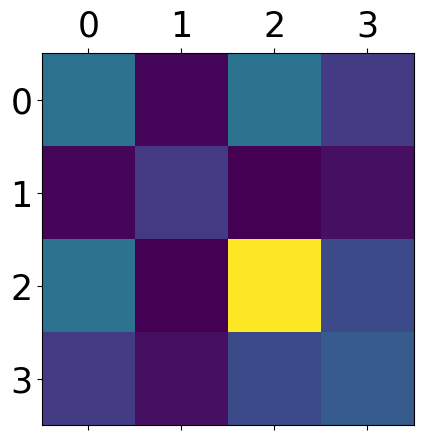

In [247]:
cov = data.cov()  * 10000
plt.matshow(cov)
cov

### Случайные тернарные портфели

Научимся генерировать случайные тернарные портфели - вектора размерности N со значениями -1, 0 и 1

In [248]:
def randBinPortf():
  return np.random.randint(3, size=N)

Доходность портфеля считаем как скалярное произведение вектора средней дневной доходности на s

Риск оценивается первым слагаемым в формуле Марковица



In [249]:
def dohPortf(s):
    return np.matmul(R.values,s)
    
def riskPortf(s):
    return np.matmul(np.matmul(s,cov.values),s)

def markovitz_form(s, risk_fear=1):
    return riskPortf(s) * risk_fear - dohPortf(s)

In [250]:
s = randBinPortf()

print(dohPortf(s))
print(riskPortf(s))

-18.250162642234745
79.70106875169604


### Генерация всех тернарных портфелей

Нужно сгенерировать все 3^N возможных тернарных портфелей

In [251]:
ternary_strings = [np.base_repr(x,base=3).rjust(N, '0') for x in range(3**N)]

ternary_portfolio = [[int(symbol) - 1 for symbol in string] for string in ternary_strings]

ternary_portfolio[:10]

[[-1, -1, -1, -1],
 [-1, -1, -1, 0],
 [-1, -1, -1, 1],
 [-1, -1, 0, -1],
 [-1, -1, 0, 0],
 [-1, -1, 0, 1],
 [-1, -1, 1, -1],
 [-1, -1, 1, 0],
 [-1, -1, 1, 1],
 [-1, 0, -1, -1]]

In [252]:
L = 3 ** N

risk = np.zeros(L)
doh = np.zeros(L)
Q = np.zeros(L)
portf = np.zeros((L, N))

for i in range(L):

  r = ternary_portfolio[i]
    
  portf[i,:] = r
  risk[i] = riskPortf(r)
  doh[i] = dohPortf(r)
  Q[i] = risk[i] - doh[i]

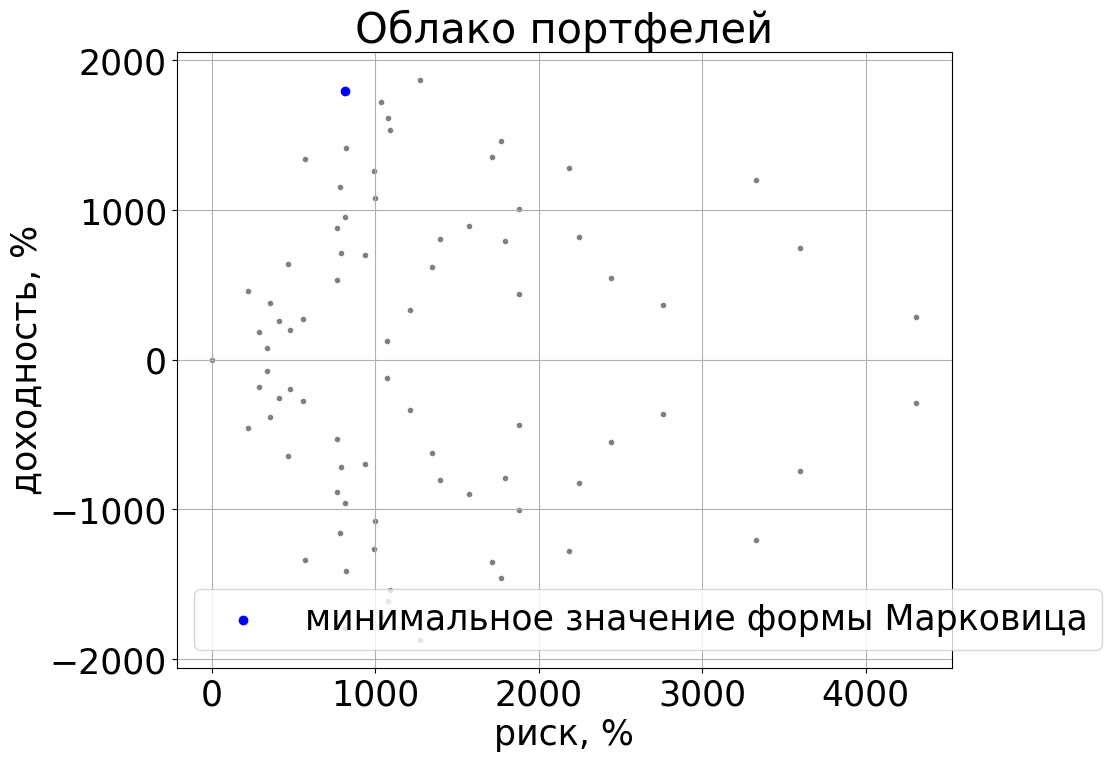

In [253]:
plt.figure(figsize=(10,8))

plt.scatter(risk*100,doh*100,c='gray',marker='.')
plt.xlabel('риск, %')
plt.ylabel('доходность, %')
plt.title("Облако портфелей")
plt.grid()

minQ = np.argmin(risk-doh)
plt.scatter([risk[minQ]*100],[doh[minQ]*100],c='b',marker='o',label='минимальное значение формы Марковица')

plt.legend()

plt.show()

# QAOA

###Some gates

Экспонента этой матрицы

1 0 0

0 1 0

0 0 0

In [254]:
class QuditSigma0Gate(QuditGate):

    def __init__(self, l1, l2, theta, dimension=3):
        self.l1 = l1
        self.l2 = l2
        self.theta = theta
        super().__init__(dimension=dimension)

    def _unitary_(self):
        N = self.d
        sigma_0 = generalized_sigma(0, self.l1, self.l2, dimension=N)
        u = scipy.linalg.expm(-1j * self.theta * sigma_0)

        return u

    def get_unitary(self):
        return self._unitary_()

    def _circuit_diagram_info_(self, args):
        self.symbol = 'Sigma0'
        SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
        SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
        return f'{self.symbol}{str(self.l1).translate(SUB)}{str(self.l2).translate(SUP)}' + f'({nice_repr(self.theta)})'

QuditSigma0Gate(0, 1, np.pi).get_unitary().round(decimals=0)

array([[-1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j]])

In [255]:
class QuquartDepolarizingChannel(QuditGate):

    def __init__(self, p1=None, dimension=3):
        super().__init__(dimension=dimension, num_qubits=1)

        # Calculation of the parameter p based on average experimental error of single qudit gate
        if p1 is None:
            f1 = 0.99
            self.p1 = (1 - f1)
        else:
            self.p1 = p1

        self.mixture_probabilities = np.ones(self.d ** 2) * self.p1 / (self.d ** 2 - 1)
        self.mixture_probabilities[0] = (1 - self.p1)  # identity probability

    def _mixture_(self):

        x_unitary = QuditGeneralizedXGate(dimension=self.d).get_unitary()
        z_unitary = QuditGeneralizedZGate(dimension=self.d).get_unitary()

        ps = []
        for alpha in range(self.d):
            for beta in range(self.d):
                op = np.linalg.matrix_power(x_unitary, alpha) @ np.linalg.matrix_power(z_unitary, beta)
                ps.append(op)

        return tuple(zip(self.mixture_probabilities, ps))

    def get_mixture(self):
        return self._mixture_()

    def _circuit_diagram_info_(self, args):
        return f"Φ(p1={self.p1:.3f})"


In [256]:
class DoubleQuquartDepolarizingChannel(QuditGate):
    def __init__(self, p2=None, dimension=3):
        super().__init__(dimension=dimension, num_qubits=2)

        # Calculation of the parameter p based on average experimental error of single qudit gate
        if p2 is None:
            f2 = 0.96
            self.p2 = (1 - f2)
        else:
            self.p2 = p2

        self.mixture_probabilities = np.ones(self.d ** 4) * self.p2 / (self.d ** 4 - 1)
        self.mixture_probabilities[0] = (1 - self.p2)  # identity probability

    def _mixture_(self):
        ps = []

        x_unitary = QuditGeneralizedXGate(dimension=self.d ** 2).get_unitary()
        z_unitary = QuditGeneralizedZGate(dimension=self.d ** 2).get_unitary()

        for alpha in range(self.d ** 2):
            for beta in range(self.d ** 2):

                op = np.linalg.matrix_power(x_unitary, alpha) @ np.linalg.matrix_power(z_unitary, beta)
                ps.append(op)

        return tuple(zip(self.mixture_probabilities, ps))

    def get_mixture(self):
        return self._mixture_()

    def _circuit_diagram_info_(self, args):
        return f"ΦΦ(p2={self.p2:.3f})", f"ΦΦ(p2={self.p2:.3f})"

### QAOA circuit

In [257]:
cov_matrix = cov.to_numpy()
N = len(cov_matrix)

qudits = cirq.LineQid.range(N, dimension=3)
error_channel = QuquartDepolarizingChannel(dimension=3)
double_error_channel = DoubleQuquartDepolarizingChannel(dimension=3)

In [258]:
def initial_layer(noise_activated=False):

    theta1 = 2 * np.arccos( (2 / 3) ** 0.5)
    theta2 = np.pi / 2
    phi = np.pi / 2
    
    gate = QuditRGate(0, 1, theta1, phi, dimension=3) 
    gate2 = QuditRGate(0, 2, theta2, phi, dimension=3)

    for q in qudits:
        yield gate.on(q)
        yield gate2.on(q)

        if noise_activated:
            yield error_channel.on(q)

In [259]:
def parse_ising_string(ising_string):
    result = {
        'single': {},
        'squared_single': {},
        'mix': {}
    }

    spl = ising_string.split(' + ')

    for elem in spl:
        if elem[-2:] == '^2' and elem.count('z') == 1:
            k = int(elem[:elem.find('z')])
            i = int(elem[-3])
            result['squared_single'][i] = k

        elif elem.count('z') == 1:
            k = int(elem[:elem.find('z')])
            i = int(elem[-1])
            result['single'][i] = k

        elif elem.count('z') == 2:
            k = int(elem[:elem.find('z')])

            i1 = int(elem[elem.find('z') + 1])
            i2 = int(elem[elem.rfind('z') + 1])
            
            result['mix'][(i1, i2)] = k

    return result




ising_string = '4z1 + -5z1 + 5z7^2 + 13z3z8'
print(parse_ising_string(ising_string))

{'single': {1: -5}, 'squared_single': {7: 5}, 'mix': {(3, 8): 13}}


In [260]:
def gamma_layer(gamma_value, ising_interacions, noise_activated=False):

    for i, val in ising_interacions['single'].items():
        q0 = qudits[i]
        gate = QuditRGate(0, 1, 2 * gamma_value  * val, 0, dimension=3) 
        yield gate.on(q0)

        if noise_activated:
            yield error_channel.on(q0)


    for i, val in ising_interacions['squared_single'].items():
        q0 = qudits[i]
        gate = QuditSigma0Gate(0, 1, 2 * gamma_value  * val)
        yield gate.on(q0)

        if noise_activated:
            yield error_channel.on(q0)
        

    for ind, val in ising_interacions['mix'].items():
        i, j = ind

        q0 = qudits[i]
        q1 = qudits[j]

        gamma_cost = gamma_value * val
        costgate = QuditZZGate(0, 1, gamma_cost, dimension=3)

        costgate2 = QuditZZGate(0, 2, gamma_cost, dimension=3)

        yield costgate.on(q0, q1)
        yield costgate2.on(q0, q1)

        if noise_activated:
            yield double_error_channel.on(q0, q1)

In [261]:
def beta_layer(beta_value, noise_activated=False):

    theta1 = 2 * np.arccos( (2 / 3) ** 0.5)
    theta2 =  np.pi / 2
    phi =  np.pi / 2

    mixgate = QuditRGate(0, 1, theta1 * beta_value, phi, dimension=3) 
    mixgate2 = QuditRGate(0, 2, theta2 * beta_value, phi, dimension=3) 

    for q in qudits:
         yield mixgate.on(q)
    for q in qudits:
         yield mixgate2.on(q)
    if noise_activated:
        for q in qudits:
            yield error_channel.on(q)

In [262]:
def qaoa_layer(gamma_value, beta_value, ising_interacions, noise_activated=False):
    layer = cirq.Circuit()

    # Implement the U(gamma, C) operator.
    layer.append(gamma_layer(gamma_value, ising_interacions, noise_activated=noise_activated))

    # Implement the U(beta, B) operator.
    layer.append(beta_layer(beta_value, noise_activated=noise_activated), strategy=InsertStrategy.NEW_THEN_INLINE)

    return layer

In [263]:
def qaoa_circuit(parameters, ising_interacions, noise_activated=False):

    N_layers = len(parameters) // 2
    qc = cirq.Circuit()

    qc.append(initial_layer(noise_activated=noise_activated))

    for i in range(N_layers):
        gamma_value, beta_value = parameters[2 * i], parameters[2 * i + 1]

        layer = qaoa_layer(gamma_value, beta_value, ising_interacions, noise_activated=noise_activated)
        qc.append(layer)
    
    return qc

###Try QAOA circuit

In [264]:
noise_activated = False

{'single': {0: 4, 2: -5}, 'squared_single': {1: 5}, 'mix': {(0, 1): 13, (2, 3): 2}}







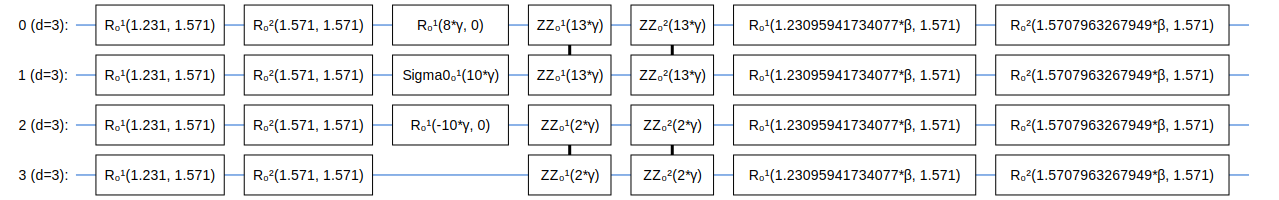

In [265]:
gamma = sympy.Symbol("γ")
beta = sympy.Symbol("β")

pars = gamma, beta

ising_string = '4z0 + -5z2 + 5z1^2 + 13z0z1 + 2z2z3'
ising_interacions = parse_ising_string(ising_string)
print(ising_interacions)

qc = qaoa_circuit(pars, ising_interacions, noise_activated)
print('\n' * 4)
SVGCircuit(qc)

###Objective calculation

### ** Отмасштабированные доходности всех тернарных портфелей**

In [266]:
markovitz_values = []
C = 1 # параметр модели марковица

for s in ternary_portfolio:
    profit_amount = np.matmul(R.values,s)
    risk_amount = np.matmul(np.matmul(s,cov.values),s)
    markovitz_values.append(risk_amount * C - profit_amount)

markovitz_values

[40.219445763559634,
 23.939747980716433,
 14.405122678314186,
 25.86684720614211,
 15.075614234940247,
 11.029453744179325,
 31.42348142221438,
 26.12071326265384,
 27.563017583534243,
 28.501572449934613,
 14.262275434079871,
 6.768050898666077,
 15.461471563897712,
 6.710639359684299,
 4.704879635911828,
 22.33060345135059,
 19.068236058778503,
 22.55094114664736,
 21.237233782919485,
 9.0383375340532,
 3.584513765627854,
 9.509630568263198,
 2.7991991310382365,
 2.833840174254219,
 17.69126012709669,
 16.469293501513057,
 21.992399356370363,
 18.927701688311966,
 7.270857049756618,
 2.3590848916422127,
 12.967360175450203,
 6.7989803485361815,
 7.375673002063102,
 26.91625143607822,
 26.23633642080552,
 32.30149388597377,
 8.775822901406718,
 -0.8406209701601757,
 -3.7119923612861285,
 4.127979059925569,
 0.0,
 2.6170934205153733,
 19.389367991934197,
 20.749853743649957,
 28.855411975806653,
 3.0774787611113616,
 -4.498564343467082,
 -5.329534967604582,
 -0.2578674089891768,
 -2.3

Objective calculation from final state vector

In [267]:
def objective_function(parameters, objective_values=markovitz_values, ising_interacions=ising_interacions, noise_activated=False, cvar_alpha=0.5, display_qc=False):
   
    qc = qaoa_circuit(parameters, ising_interacions, noise_activated)

    if display_qc:
        display(qc)

    if not noise_activated:
        sim = cirq.Simulator()
        state_vector_out = sim.simulate(qc).final_state_vector
        probabilities = (np.abs(state_vector_out) ** 2).real

    else:
        sim = cirq.DensityMatrixSimulator()
        density_matrix_out = sim.simulate(qc).final_density_matrix
        probabilities = (np.diagonal(density_matrix_out)).real

    energy = 0
    K = int(np.ceil(cvar_alpha * len(objective_values)))

    for i in np.argsort(objective_values)[:K]:
        energy += probabilities[i] * objective_values[i]

    return energy


pars = np.array([10000, 2, 10000, 2])
objective_function(pars, objective_values=markovitz_values, ising_interacions=financial_interactions, noise_activated=False, cvar_alpha=0.5, display_qc=True)

┌──────────────────────┐   ┌──────────────────────┐                                                                                                                                                                             ┌──────────────────────┐   ┌──────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(5.170, 0)─────ZZ₀¹(0.783)───ZZ₀²(0.783)───ZZ₀¹(4.196)───ZZ₀²(4.196)────ZZ₀¹(2.311)────────────────ZZ₀²(2.311)───────────────────────────────────────────────────────────────────────R₀¹(2.462, 1.571)───R₀²(3.142, 1.571)───R₀¹(5.170, 0)─────ZZ₀¹(0.783)───ZZ₀²(0.783)───ZZ₀¹(4.196)───ZZ₀²(4.196)────ZZ₀¹(2.311)────────────────ZZ₀²(2.311)───────────────────────────────────────────────────────────────────────R₀¹(2.462, 1.571)───R₀²(3.142, 1.571)───
                                                                      │             │             │             │              │                          │                                                                                                                                           │             │             │             │              │                          │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(9.144, 0)─────ZZ₀¹(0.783)───ZZ₀²(0.783)───┼─────────────┼──────────────┼──────────ZZ₀¹(0.656)─────┼──────────ZZ₀²(0.656)────ZZ₀¹(1.020)───ZZ₀²(1.020)───────────────────────────────R₀¹(2.462, 1.571)───R₀²(3.142, 1.571)───R₀¹(9.144, 0)─────ZZ₀¹(0.783)───ZZ₀²(0.783)───┼─────────────┼──────────────┼──────────ZZ₀¹(0.656)─────┼──────────ZZ₀²(0.656)────ZZ₀¹(1.020)───ZZ₀²(1.020)───────────────────────────────R₀¹(2.462, 1.571)───R₀²(3.142, 1.571)───
                                                                                                  │             │              │          │               │          │              │             │                                                                                                                               │             │              │          │               │          │              │             │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-21.590, 0)───────────────────────────────ZZ₀¹(4.196)───ZZ₀²(4.196)────┼──────────ZZ₀¹(0.656)─────┼──────────ZZ₀²(0.656)────┼─────────────┼─────────────ZZ₀¹(2.744)───ZZ₀²(2.744)───R₀¹(2.462, 1.571)───R₀²(3.142, 1.571)───R₀¹(-21.590, 0)───────────────────────────────ZZ₀¹(4.196)───ZZ₀²(4.196)────┼──────────ZZ₀¹(0.656)─────┼──────────ZZ₀²(0.656)────┼─────────────┼─────────────ZZ₀¹(2.744)───ZZ₀²(2.744)───R₀¹(2.462, 1.571)───R₀²(3.142, 1.571)───
                                                                                                                               │                          │                         │             │             │             │                                                                                                                                │                          │                         │             │             │             │
3 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(1.511, 0)──────────────────────────────────────────────────────────────ZZ₀¹(2.311)────────────────ZZ₀²(2.311)───────────────ZZ₀¹(1.020)───ZZ₀²(1.020)───ZZ₀¹(2.744)───ZZ₀²(2.744)───R₀¹(2.462, 1.571)───R₀²(3.142, 1.571)───R₀¹(1.511, 0)──────────────────────────────────────────────────────────────ZZ₀¹(2.311)────────────────ZZ₀²(2.311)───────────────ZZ₀¹(1.020)───ZZ₀²(1.020)───ZZ₀¹(2.744)───ZZ₀²(2.744)───R₀¹(2.462, 1.571)───R₀²(3.142, 1.571)───
                                                                                                                              └──────────────────────┘   └──────────────────────┘                                                                                                                                                                             └──────────────────────┘   └──────────────────────┘

1.2938918746991606

In [268]:
financial_interactions

{'single': {0: 0.0002584869251870288,
  1: 0.00045722130252312374,
  2: -0.0010795237356905065,
  3: 7.554428197050979e-05},
 'squared_single': {},
 'mix': {(0, 1): 7.82997263359884e-05,
  (0, 2): 0.0004196128522277875,
  (0, 3): 0.0002311426572143922,
  (1, 2): 6.562488356903065e-05,
  (1, 3): 0.00010202003834942264,
  (2, 3): 0.00027442324058206635}}

#Sample hamiltonians

### H =  z1 + z2

In [269]:
sum_en_values = []

for s in ternary_portfolio:
    a = (s[2] + 2) % 3 - 1
    b = (s[3] + 2) % 3 - 1
    sum_en_values.append(a + b)

print(*sum_en_values)

0 1 -1 1 2 0 -1 0 -2 0 1 -1 1 2 0 -1 0 -2 0 1 -1 1 2 0 -1 0 -2 0 1 -1 1 2 0 -1 0 -2 0 1 -1 1 2 0 -1 0 -2 0 1 -1 1 2 0 -1 0 -2 0 1 -1 1 2 0 -1 0 -2 0 1 -1 1 2 0 -1 0 -2 0 1 -1 1 2 0 -1 0 -2


In [270]:
ising_string = '1z0 + 1z1'
ising_interactions = parse_ising_string(ising_string)
ising_interactions 

{'single': {0: 1, 1: 1}, 'squared_single': {}, 'mix': {}}

In [271]:
obj_vals = sum_en_values
ising_interacions = ising_interacions 

x0 = np.random.randint(1, 10, size=4)

In [272]:
obj_list = []

global_method = 'COBYLA'

def callback_tracker(xi):
    obj_value = objective_function(xi, objective_values=sum_en_values, ising_interacions=ising_interactions, noise_activated=False)
    obj_list.append(obj_value)

res = minimize(objective_function, x0, args=(sum_en_values, ising_interacions, False), method=global_method, callback=callback_tracker, options={'maxiter':40})

In [273]:
obj_list_noise = []

def callback_tracker(xi):
    obj_value = objective_function(xi, objective_values=sum_en_values, ising_interacions=ising_interactions, noise_activated=True)
    obj_list_noise.append(obj_value)
    
res2 = minimize(objective_function, x0, args=(sum_en_values, ising_interacions, True), method=global_method, callback=callback_tracker, options={'maxiter':40})

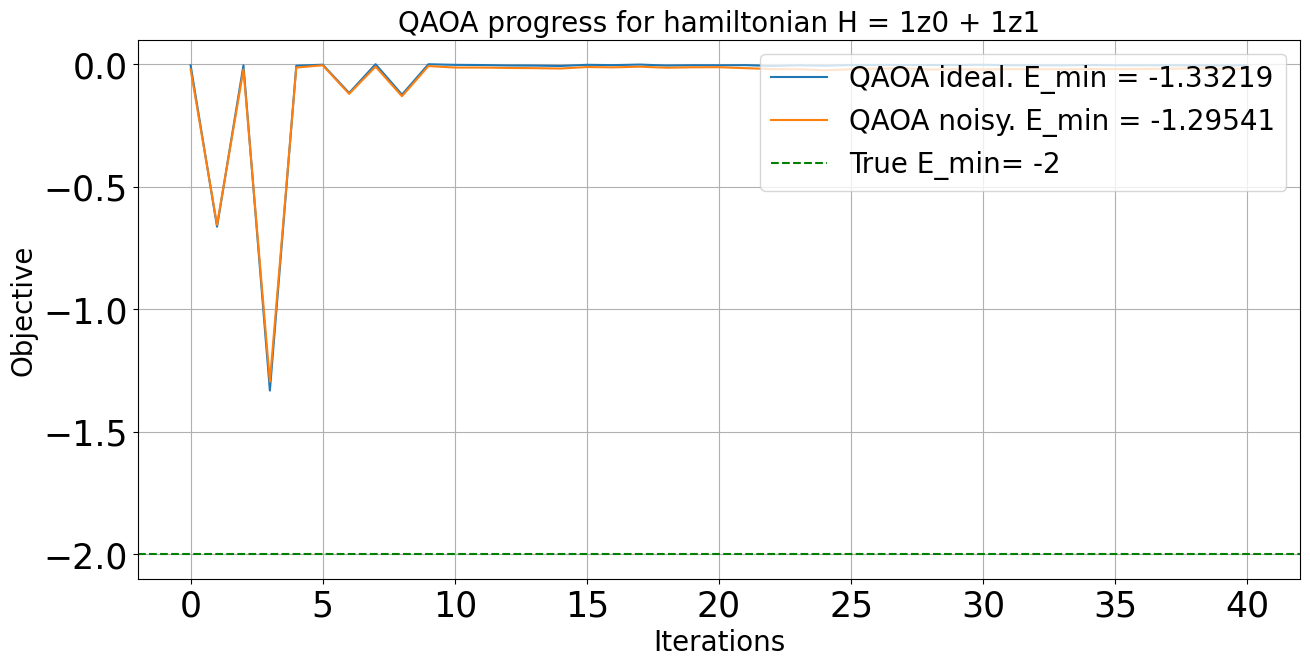

In [274]:
plt.figure(figsize=(15, 7))
plt.title(f"QAOA progress for hamiltonian H = {ising_string}", fontsize=20)

x = list(range(len(obj_list)))
plt.plot(x, obj_list, label=f'QAOA ideal. E_min = {round(min(obj_list), 5)}')

x2 = list(range(len(obj_list_noise)))
plt.plot(x2, obj_list_noise , label=f'QAOA noisy. E_min = {round(min(obj_list_noise), 5)}')

plt.axhline(y=np.min(sum_en_values), color='g', linestyle='--', label=f'True E_min= {round(np.min(sum_en_values), 5)}')

plt.grid()
plt.xlabel("Iterations", fontsize=20)
plt.ylabel("Objective", fontsize=20)
plt.legend(fontsize=20, loc='upper right')


plt.show()

### H = - (z1 + z2)

In [275]:
sum_en_values = []

for s in ternary_portfolio:
    a = (s[2] + 2) % 3 - 1
    b = (s[3] + 2) % 3 - 1
    sum_en_values.append(-a - b)

print(*sum_en_values)

0 -1 1 -1 -2 0 1 0 2 0 -1 1 -1 -2 0 1 0 2 0 -1 1 -1 -2 0 1 0 2 0 -1 1 -1 -2 0 1 0 2 0 -1 1 -1 -2 0 1 0 2 0 -1 1 -1 -2 0 1 0 2 0 -1 1 -1 -2 0 1 0 2 0 -1 1 -1 -2 0 1 0 2 0 -1 1 -1 -2 0 1 0 2


In [276]:
ising_string = '-1z0 + -1z1'
ising_interacions = parse_ising_string(ising_string)
ising_interacions 

{'single': {0: -1, 1: -1}, 'squared_single': {}, 'mix': {}}

In [277]:
obj_vals = sum_en_values
ising_interacions = ising_interacions 

x0 = np.random.randint(1, 10, size=4)

In [278]:
obj_list = []

def callback_tracker(xi):
    obj_value = objective_function(xi, objective_values=sum_en_values)
    obj_list.append(obj_value)

res = minimize(objective_function, x0, args=(sum_en_values, ising_interacions, False), method=global_method, callback=callback_tracker, options={'maxiter':40})

In [279]:
obj_list_noise = []

def callback_tracker(xi):
    obj_value = objective_function(xi, objective_values=sum_en_values, noise_activated=True)
    obj_list_noise.append(obj_value)
    
res2 = minimize(objective_function, x0, args=(sum_en_values, ising_interacions, True), method=global_method, callback=callback_tracker, options={'maxiter':40})

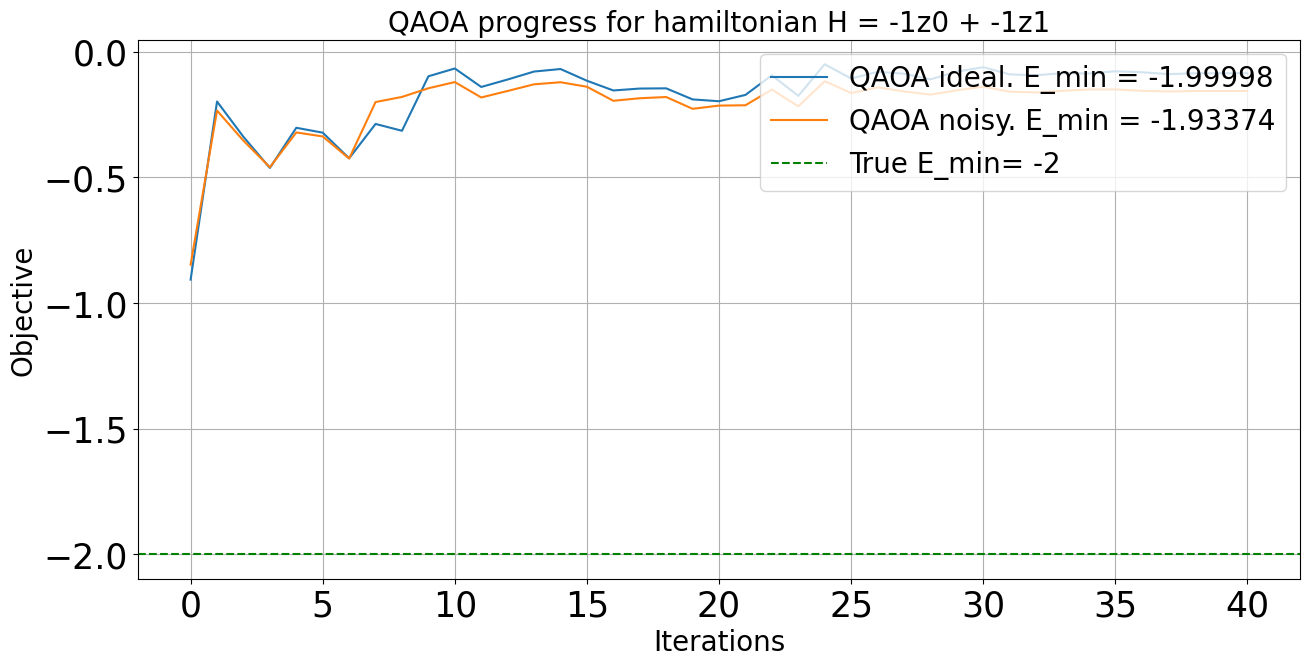

In [280]:
plt.figure(figsize=(15, 7))
plt.title(f"QAOA progress for hamiltonian H = {ising_string}", fontsize=20)

x = list(range(len(obj_list)))
plt.plot(x, obj_list, label=f'QAOA ideal. E_min = {round(res.fun, 5)}')

x2 = list(range(len(obj_list_noise)))
plt.plot(x2, obj_list_noise , label=f'QAOA noisy. E_min = {round(res2.fun, 5)}')

plt.axhline(y=np.min(sum_en_values), color='g', linestyle='--', label=f'True E_min= {round(np.min(sum_en_values), 5)}')

plt.grid()
plt.xlabel("Iterations", fontsize=20)
plt.ylabel("Objective", fontsize=20)
plt.legend(fontsize=20, loc='upper right')


plt.show()

## Layer dependency

In [281]:
ising_string = '1z1^2 + 2z1z2 + 1z2^2'
ising_interacions = parse_ising_string(ising_string)
ising_interacions 

{'single': {}, 'squared_single': {1: 1, 2: 1}, 'mix': {(1, 2): 2}}

In [282]:
sample3_ham_values = []

for s in ternary_portfolio:
    z1 = (s[1] + 2) % 3 - 1
    z2 = (s[2] + 2) % 3 - 1
    sample3_ham_values.append(z1 ** 2 + 2 * z1 * z2 + z2 ** 2)
    

In [283]:
obj_vals = sample3_ham_values
ising_interacions = ising_interacions 

In [284]:
objective_function([1, 6], sample3_ham_values, ising_interacions, True)

0.13579529248090694

In [285]:
qaoa_results_ideal = dict()
qaoa_results_noisy = dict()

x0 = np.random.randint(1, 5, size=2)

best_pars = x0
best_pars2 = x0

for layer_number in range(1, 9, 1):

    print(f'Layer = {layer_number}')

    if len(best_pars) >  0:
        x0 = np.concatenate((best_pars, [1, 1]))

    res = minimize(objective_function, x0, args=(sample3_ham_values, ising_interacions, False), method=global_method, options={'maxiter':40})

    if len(best_pars2) >  0:
        x0 = np.concatenate((best_pars2, [1, 1]))

    res2 = minimize(objective_function, x0, args=(sample3_ham_values, ising_interacions, True), method=global_method, options={'maxiter':40})

    print(res)
    print(res2)

    best_pars = res.x
    best_pars2 = res2.x
 
    print(best_pars)
    print(best_pars2)

    qaoa_results_ideal[layer_number] = res.fun
    qaoa_results_noisy[layer_number] = res2.fun

Layer = 1
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 0.002181087972530804
       x: [ 2.257e+00  9.079e-01  2.051e+00  1.126e+00]
    nfev: 40
   maxcv: 0.0
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 0.020818931339817937
       x: [ 2.289e+00  8.479e-01  2.035e+00  1.150e+00]
    nfev: 40
   maxcv: 0.0
[2.25731671 0.90786801 2.05132923 1.12579454]
[2.28861309 0.84791039 2.03454614 1.15045591]
Layer = 2
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 0.00546894165768208
       x: [ 2.584e+00  6.746e-01  1.994e+00  1.351e+00  8.978e-01
            1.966e+00]
    nfev: 40
   maxcv: 0.0
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 0.029255423581162177
       x: [ 2.096e+00  7.997e-01  2.562e+00  1.832e+00  1.008e+00
            2.451e+00]
    nfev: 

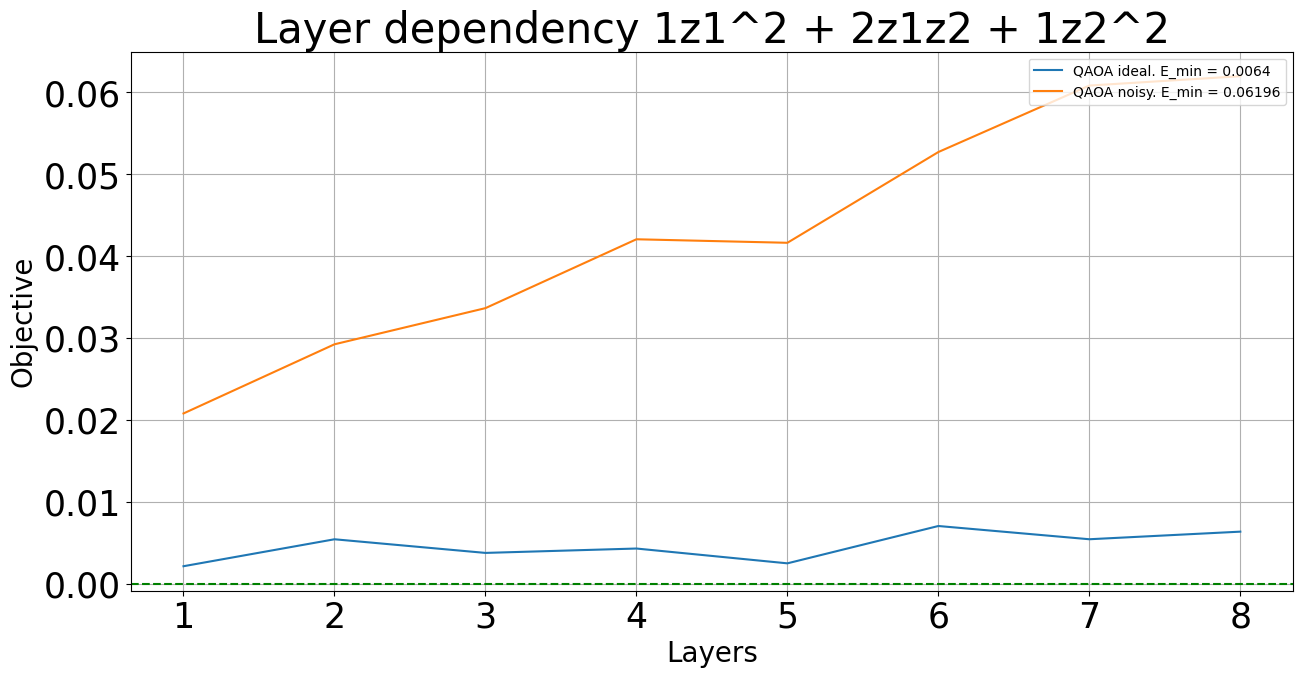

In [286]:
plt.figure(figsize=(15, 7))
plt.title(f"Layer dependency {ising_string}", fontsize=30)

lists = qaoa_results_ideal.items()
x, y = zip(*lists)
plt.plot(x, y, label=f'QAOA ideal. E_min = {round(res.fun, 5)}')


lists = qaoa_results_noisy.items()
x, y = zip(*lists)
plt.plot(x, y, label=f'QAOA noisy. E_min = {round(res2.fun, 5)}')

plt.grid()
plt.xlabel("Layers", fontsize=20)
plt.ylabel("Objective", fontsize=20)
plt.legend(fontsize=10, loc='upper right')

plt.axhline(y=np.min(obj_vals), color='g', linestyle='--', label=f'True E_min= {round(np.min(sum_en_values), 5)}')

plt.show()

# Quantum financial optimization

In [287]:
financial_interactions = {'single': {}, 'squared_single':{}, 'mix': {}}

for i in range(len(R)):
    financial_interactions['single'][i] = R[i]

for i in range(len(cov)):
    for j in range(i + 1, len(cov)):
        financial_interactions['mix'][(i, j)] = cov_matrix[i][j]

financial_interactions

{'single': {0: 2.584869251870288,
  1: 4.572213025231237,
  2: -10.795237356905066,
  3: 0.7554428197050979},
 'squared_single': {},
 'mix': {(0, 1): 0.7829972633598841,
  (0, 2): 4.196128522277875,
  (0, 3): 2.311426572143922,
  (1, 2): 0.6562488356903066,
  (1, 3): 1.0202003834942264,
  (2, 3): 2.7442324058206635}}

# Another optimizers

In [288]:
from scipy.optimize import OptimizeResult

def SPSA(
    fun,
    x0,
    args=(),
    maxfev=None,
    a0=1000,
    c0=1000,
    A=1,
    alpha=0.0602,
    gamma=0.0101,
    maxiter=20,
    tol=10 ** (-7),
    jac=None,
    callback=None,
    **options
):

    obj_list = []

    def grad_SPSA(params, c):
        delta = 2 * np.random.randint(0, 2, size=len(params)) - 1
        grad = np.real(
            (fun(params + c * delta) - fun(params - c * delta)) * delta / (2 * c)
        )
        return grad * 1e8
        

    bestx = x0
    besty = fun(x0)
    funcalls = 1  # tracks no. of function evals.
    niter = 0
    improved = True
    stop = False

    testx = np.copy(bestx)
    testy = np.real(fun(testx, *args))

    a = a0
    c = c0
    
    while improved and not stop and niter < maxiter:
        improved = False
        niter += 1

        # gain sequences
        a = a / (A + niter + 1) ** alpha
        c = c / (niter + 1) ** gamma

        # compute gradient descent step

        # print(a, grad_SPSA(testx, c))
        testx = testx - a * grad_SPSA(testx, c)
        testy = np.real(fun(testx, *args))
        funcalls += 1

        if np.abs(besty - testy) < tol:
            improved = False
        else:
            improved = True

        if testy < besty:  
            besty = testy
            bestx = testx

        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break
        
        print(testx, testy, besty)
        obj_list.append(testy)

    return OptimizeResult(
        fun=besty, x=bestx, nit=niter, nfev=funcalls, success=(niter > 1)
    ), obj_list

### L = 2 layer

In [289]:
x0 = np.random.randint(1, 10000, size=4)

obj_vals = markovitz_values
ising_interacions = financial_interactions

result, obj_list = SPSA(objective_function, x0, args=(obj_vals, financial_interactions, False, 0.2, True))

# best result
print(result)
print(obj_list)

┌───────────────────────────┐   ┌───────────────────────────┐                                                                                                                                                                                                           ┌───────────────────────────┐   ┌───────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(2331.552, 0)────ZZ₀¹(353.132)───ZZ₀²(353.132)───ZZ₀¹(1892.454)───ZZ₀²(1892.454)────ZZ₀¹(1042.453)──────────────────ZZ₀²(1042.453)───────────────────────────────────────────────────────────────────────────────────R₀¹(9491.928, 1.571)───R₀²(12112.410, 1.571)───R₀¹(6162.328, 0)─────ZZ₀¹(933.333)───ZZ₀²(933.333)───ZZ₀¹(5001.785)───ZZ₀²(5001.785)────ZZ₀¹(2755.220)──────────────────ZZ₀²(2755.220)─────────────────────────────────────────────────────────────────────────────────────R₀¹(10929.689, 1.571)───R₀²(13947.101, 1.571)───
                                                                        │               │               │                │                 │                               │                                                                                                                                                                    │               │               │                │                 │                               │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(4124.136, 0)────ZZ₀¹(353.132)───ZZ₀²(353.132)───┼────────────────┼─────────────────┼─────────────ZZ₀¹(295.968)─────┼─────────────ZZ₀²(295.968)────ZZ₀¹(460.110)───ZZ₀²(460.110)─────────────────────────────────────R₀¹(9491.928, 1.571)───R₀²(12112.410, 1.571)───R₀¹(10900.156, 0)────ZZ₀¹(933.333)───ZZ₀²(933.333)───┼────────────────┼─────────────────┼─────────────ZZ₀¹(782.249)─────┼─────────────ZZ₀²(782.249)────ZZ₀¹(1216.079)───ZZ₀²(1216.079)─────────────────────────────────────R₀¹(10929.689, 1.571)───R₀²(13947.101, 1.571)───
                                                                                                        │                │                 │             │                 │             │                │               │                                                                                                                                                     │                │                 │             │                 │             │                │                │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-9737.304, 0)───────────────────────────────────ZZ₀¹(1892.454)───ZZ₀²(1892.454)────┼─────────────ZZ₀¹(295.968)─────┼─────────────ZZ₀²(295.968)────┼───────────────┼───────────────ZZ₀¹(1237.649)───ZZ₀²(1237.649)───R₀¹(9491.928, 1.571)───R₀²(12112.410, 1.571)───R₀¹(-25735.846, 0)───────────────────────────────────ZZ₀¹(5001.785)───ZZ₀²(5001.785)────┼─────────────ZZ₀¹(782.249)─────┼─────────────ZZ₀²(782.249)────┼────────────────┼────────────────ZZ₀¹(3271.125)───ZZ₀²(3271.125)───R₀¹(10929.689, 1.571)───R₀²(13947.101, 1.571)───
                                                                                                                                           │                               │                              │               │               │                │                                                                                                                                                       │                               │                              │                │                │                │
3 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(681.409, 0)────────────────────────────────────────────────────────────────────────ZZ₀¹(1042.453)──────────────────ZZ₀²(1042.453)─────────────────ZZ₀¹(460.110)───ZZ₀²(460.110)───ZZ₀¹(1237.649)───ZZ₀²(1237.649)───R₀¹(9491.928, 1.571)───R₀²(12112.410, 1.571)───R₀¹(1800.976, 0)────────────────────────────────────────────────────────────────────────ZZ₀¹(2755.220)──────────────────ZZ₀²(2755.220)─────────────────ZZ₀¹(1216.079)───Z

┌─────────────────────────────────────┐   ┌─────────────────────────────────────┐                                                                                                                                                                                                                                                                ┌─────────────────────────────────────┐   ┌─────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-63703545.293, 0)────ZZ₀¹(-9648399.352)───ZZ₀²(-9648399.352)───ZZ₀¹(-51706341.275)───ZZ₀²(-51706341.275)────ZZ₀¹(-28482304.709)───────────────────────ZZ₀²(-28482304.709)──────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(15178411.785, 1.571)───R₀²(19368789.208, 1.571)───R₀¹(-63699714.517, 0)────ZZ₀¹(-9647819.151)───ZZ₀²(-9647819.151)───ZZ₀¹(-51703231.943)───ZZ₀²(-51703231.943)────ZZ₀¹(-28480591.942)───────────────────────ZZ₀²(-28480591.942)──────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(15179849.545, 1.571)───R₀²(19370623.898, 1.571)───
                                                                             │                    │                    │                     │                      │                                         │                                                                                                                                                                                                               │                    │                    │                     │                      │                                         │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-112681204.023, 0)───ZZ₀¹(-9648399.352)───ZZ₀²(-9648399.352)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(-8086555.519)─────┼──────────────────ZZ₀²(-8086555.519)────ZZ₀¹(-12571309.224)───ZZ₀²(-12571309.224)───────────────────────────────────────────────R₀¹(15178411.785, 1.571)───R₀²(19368789.208, 1.571)───R₀¹(-112674428.004, 0)───ZZ₀¹(-9647819.151)───ZZ₀²(-9647819.151)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(-8086069.238)─────┼──────────────────ZZ₀²(-8086069.238)────ZZ₀¹(-12570553.256)───ZZ₀²(-12570553.256)───────────────────────────────────────────────R₀¹(15179849.545, 1.571)───R₀²(19370623.898, 1.571)───
                                                                                                                       │                     │                      │                  │                      │                  │                     │                     │                                                                                                                                                                                          │                     │                      │                  │                      │                  │                     │                     │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(266046296.702, 0)──────────────────────────────────────────────ZZ₀¹(-51706341.275)───ZZ₀²(-51706341.275)────┼──────────────────ZZ₀¹(-8086555.519)─────┼──────────────────ZZ₀²(-8086555.519)────┼─────────────────────┼─────────────────────ZZ₀¹(-33815507.928)───ZZ₀²(-33815507.928)───R₀¹(15178411.785, 1.571)───R₀²(19368789.208, 1.571)───R₀¹(266030298.160, 0)──────────────────────────────────────────────ZZ₀¹(-51703231.943)───ZZ₀²(-51703231.943)────┼──────────────────ZZ₀¹(-8086069.238)─────┼──────────────────ZZ₀²(-8086069.238)────┼─────────────────────┼─────────────────────ZZ₀¹(-33813474.452)───ZZ₀²(-33813474.452)───R₀¹(15179849.545, 1.571)───R₀²(19370623.898, 1.571)───
                                                                                                                                                                    │                                         │                                        

[-12322392.176554  12330554.176554 -12321651.176554  12331722.176554] -0.9466799919363342 -0.9466799919363342


┌───────────────────────────────────┐   ┌───────────────────────────────────┐                                                                                                                                                                                                                                                          ┌───────────────────────────────────┐   ┌───────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(73181991.389, 0)─────ZZ₀¹(11083984.024)───ZZ₀²(11083984.024)───ZZ₀¹(59399724.215)───ZZ₀²(59399724.215)────ZZ₀¹(32720184.856)──────────────────────ZZ₀²(32720184.856)─────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(47772041.106, 1.571)───R₀²(60960699.138, 1.571)───R₀¹(73185822.165, 0)─────ZZ₀¹(11084564.225)───ZZ₀²(11084564.225)───ZZ₀¹(59402833.546)───ZZ₀²(59402833.546)────ZZ₀¹(32721897.623)──────────────────────ZZ₀²(32721897.623)─────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(47773478.866, 1.571)───R₀²(60962533.829, 1.571)───
                                                                             │                    │                    │                    │                     │                                       │                                                                                                                                                                                                         │                    │                    │                    │                     │                                       │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(129447032.572, 0)────ZZ₀¹(11083984.024)───ZZ₀²(11083984.024)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(9289753.555)─────┼─────────────────ZZ₀²(9289753.555)────ZZ₀¹(14441793.454)───ZZ₀²(14441793.454)─────────────────────────────────────────────R₀¹(47772041.106, 1.571)───R₀²(60960699.138, 1.571)───R₀¹(129453808.592, 0)────ZZ₀¹(11084564.225)───ZZ₀²(11084564.225)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(9290239.835)─────┼─────────────────ZZ₀²(9290239.835)────ZZ₀¹(14442549.422)───ZZ₀²(14442549.422)─────────────────────────────────────────────R₀¹(47773478.866, 1.571)───R₀²(60962533.829, 1.571)───
                                                                                                                       │                    │                     │                 │                     │                 │                    │                    │                                                                                                                                                                                       │                    │                     │                 │                     │                 │                    │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-305631306.778, 0)─────────────────────────────────────────────ZZ₀¹(59399724.215)───ZZ₀²(59399724.215)────┼─────────────────ZZ₀¹(9289753.555)─────┼─────────────────ZZ₀²(9289753.555)────┼────────────────────┼────────────────────ZZ₀¹(38846915.013)───ZZ₀²(38846915.013)───R₀¹(47772041.106, 1.571)───R₀²(60960699.138, 1.571)───R₀¹(-305647305.319, 0)─────────────────────────────────────────────ZZ₀¹(59402833.546)───ZZ₀²(59402833.546)────┼─────────────────ZZ₀¹(9290239.835)─────┼─────────────────ZZ₀²(9290239.835)────┼────────────────────┼────────────────────ZZ₀¹(38848948.489)───ZZ₀²(38848948.489)───R₀¹(47773478.866, 1.571)───R₀²(60962533.829, 1.571)───
                                                                                                                                                                  │                                       │                                      │                    │                    │                    │                                               

[14155840.05580073 38808786.40890874 14156581.05580073 38809954.40890874] -1.1095283509749791 -1.1095283509749791


┌───────────────────────────────────┐   ┌───────────────────────────────────┐                                                                                                                                                                                                                                                          ┌────────────────────────────────────┐   ┌────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(61940271.850, 0)─────ZZ₀¹(9381337.821)───ZZ₀²(9381337.821)───ZZ₀¹(50275142.775)───ZZ₀²(50275142.775)────ZZ₀¹(27693932.708)──────────────────────ZZ₀²(27693932.708)─────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(50448791.685, 1.571)───R₀²(64376433.174, 1.571)───R₀¹(84427541.705, 0)─────ZZ₀¹(12787210.428)───ZZ₀²(12787210.428)───ZZ₀¹(68527414.986)───ZZ₀²(68527414.986)────ZZ₀¹(37748149.771)───────────────────────ZZ₀²(37748149.771)──────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(45096728.287, 1.571)───R₀²(57546799.793, 1.571)───
                                                                             │                   │                   │                    │                     │                                       │                                                                                                                                                                                                         │                    │                    │                    │                     │                                        │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(109562260.270, 0)────ZZ₀¹(9381337.821)───ZZ₀²(9381337.821)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(7862724.827)─────┼─────────────────ZZ₀²(7862724.827)────ZZ₀¹(12223343.415)───ZZ₀²(12223343.415)─────────────────────────────────────────────R₀¹(50448791.685, 1.571)───R₀²(64376433.174, 1.571)───R₀¹(149338580.895, 0)────ZZ₀¹(12787210.428)───ZZ₀²(12787210.428)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(10717268.563)─────┼─────────────────ZZ₀²(10717268.563)────ZZ₀¹(16660999.461)───ZZ₀²(16660999.461)─────────────────────────────────────────────R₀¹(45096728.287, 1.571)───R₀²(57546799.793, 1.571)───
                                                                                                                     │                    │                     │                 │                     │                 │                    │                    │                                                                                                                                                                                       │                    │                     │                 │                      │                 │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-258682305.143, 0)───────────────────────────────────────────ZZ₀¹(50275142.775)───ZZ₀²(50275142.775)────┼─────────────────ZZ₀¹(7862724.827)─────┼─────────────────ZZ₀²(7862724.827)────┼────────────────────┼────────────────────ZZ₀¹(32879516.268)───ZZ₀²(32879516.268)───R₀¹(50448791.685, 1.571)───R₀²(64376433.174, 1.571)───R₀¹(-352596306.954, 0)─────────────────────────────────────────────ZZ₀¹(68527414.986)───ZZ₀²(68527414.986)────┼─────────────────ZZ₀¹(10717268.563)─────┼─────────────────ZZ₀²(10717268.563)────┼────────────────────┼────────────────────ZZ₀¹(44816347.234)───ZZ₀²(44816347.234)───R₀¹(45096728.287, 1.571)───R₀²(57546799.793, 1.571)───
                                                                                                                                                                │                                       │                                      │                    │                    │                    │                                                

[11981316.23189757 40983310.2328119  16331104.87970389 36635430.58500558] -0.8182166793631386 -1.1095283509749791


┌─────────────────────────────────────┐   ┌─────────────────────────────────────┐                                                                                                                                                                                                                                                                  ┌──────────────────────────────────────┐   ┌──────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(293214026.234, 0)─────ZZ₀¹(44409553.782)───ZZ₀²(44409553.782)───ZZ₀¹(237993418.375)───ZZ₀²(237993418.375)────ZZ₀¹(131098060.583)───────────────────────ZZ₀²(131098060.583)────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-4619488.023, 1.571)───R₀²(-5894812.385, 1.571)───R₀¹(-146846212.679, 0)───ZZ₀¹(-22241005.532)───ZZ₀²(-22241005.532)───ZZ₀¹(-119190860.614)───ZZ₀²(-119190860.614)────ZZ₀¹(-65655978.104)────────────────────────ZZ₀²(-65655978.104)───────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(100165007.995, 1.571)───R₀²(127818045.352, 1.571)───
                                                                              │                    │                    │                     │                      │                                         │                                                                                                                                                                                                             │                     │                     │                      │                       │                                          │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(518647892.521, 0)─────ZZ₀¹(44409553.782)───ZZ₀²(44409553.782)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(37220714.971)─────┼──────────────────ZZ₀²(37220714.971)────ZZ₀¹(57863093.422)───ZZ₀²(57863093.422)───────────────────────────────────────────────R₀¹(-4619488.023, 1.571)───R₀²(-5894812.385, 1.571)───R₀¹(-259747051.357, 0)───ZZ₀¹(-22241005.532)───ZZ₀²(-22241005.532)───┼──────────────────────┼───────────────────────┼──────────────────ZZ₀¹(-18640721.581)─────┼──────────────────ZZ₀²(-18640721.581)────ZZ₀¹(-28978750.546)───ZZ₀²(-28978750.546)───────────────────────────────────────────────R₀¹(100165007.995, 1.571)───R₀²(127818045.352, 1.571)───
                                                                                                                        │                     │                      │                  │                      │                  │                     │                    │                                                                                                                                                                                           │                      │                       │                  │                       │                  │                      │                     │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-1224555171.321, 0)─────────────────────────────────────────────ZZ₀¹(237993418.375)───ZZ₀²(237993418.375)────┼──────────────────ZZ₀¹(37220714.971)─────┼──────────────────ZZ₀²(37220714.971)────┼────────────────────┼────────────────────ZZ₀¹(155645673.770)───ZZ₀²(155645673.770)───R₀¹(-4619488.023, 1.571)───R₀²(-5894812.385, 1.571)───R₀¹(613276559.224, 0)────────────────────────────────────────────────ZZ₀¹(-119190860.614)───ZZ₀²(-119190860.614)────┼──────────────────ZZ₀¹(-18640721.581)─────┼──────────────────ZZ₀²(-18640721.581)────┼─────────────────────┼─────────────────────ZZ₀¹(-77949810.269)───ZZ₀²(-77949810.269)───R₀¹(100165007.995, 1.571)───R₀²(127818045.352, 1.571)───
                                                                                                                                                                     │                                         │     

[ 56717380.58346089  -3752754.11875142 -28404959.47185943
  81371494.9365689 ] -1.2485784272273748 -1.2485784272273748


┌────────────────────────────────────┐   ┌────────────────────────────────────┐                                                                                                                                                                                                                                                             ┌─────────────────────────────────────┐   ┌─────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(193739829.071, 0)────ZZ₀¹(29343409.895)───ZZ₀²(29343409.895)───ZZ₀¹(157253064.556)───ZZ₀²(157253064.556)────ZZ₀¹(86622444.960)───────────────────────ZZ₀²(86622444.960)────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(19066178.029, 1.571)───R₀²(24329869.850, 1.571)───R₀¹(-47372015.516, 0)───ZZ₀¹(-7174861.646)───ZZ₀²(-7174861.646)───ZZ₀¹(-38450506.795)───ZZ₀²(-38450506.795)────ZZ₀¹(-21180362.481)───────────────────────ZZ₀²(-21180362.481)────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(76479341.942, 1.571)───R₀²(97593363.117, 1.571)───
                                                                             │                    │                    │                     │                      │                                        │                                                                                                                                                                                                           │                    │                    │                     │                      │                                         │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(342694226.930, 0)────ZZ₀¹(29343409.895)───ZZ₀²(29343409.895)───┼─────────────────────┼──────────────────────┼─────────────────ZZ₀¹(24593417.474)─────┼─────────────────ZZ₀²(24593417.474)────ZZ₀¹(38232774.786)───ZZ₀²(38232774.786)───────────────────────────────────────────────R₀¹(19066178.029, 1.571)───R₀²(24329869.850, 1.571)───R₀¹(-83793385.765, 0)───ZZ₀¹(-7174861.646)───ZZ₀²(-7174861.646)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(-6013424.084)─────┼──────────────────ZZ₀²(-6013424.084)────ZZ₀¹(-9348431.910)───ZZ₀²(-9348431.910)───────────────────────────────────────────────R₀¹(76479341.942, 1.571)───R₀²(97593363.117, 1.571)───
                                                                                                                       │                     │                      │                 │                      │                 │                     │                    │                                                                                                                                                                                        │                     │                      │                  │                      │                  │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-809119238.350, 0)─────────────────────────────────────────────ZZ₀¹(157253064.556)───ZZ₀²(157253064.556)────┼─────────────────ZZ₀¹(24593417.474)─────┼─────────────────ZZ₀²(24593417.474)────┼────────────────────┼────────────────────ZZ₀¹(102842168.293)───ZZ₀²(102842168.293)───R₀¹(19066178.029, 1.571)───R₀²(24329869.850, 1.571)───R₀¹(197840626.253, 0)─────────────────────────────────────────────ZZ₀¹(-38450506.795)───ZZ₀²(-38450506.795)────┼──────────────────ZZ₀¹(-6013424.084)─────┼──────────────────ZZ₀²(-6013424.084)────┼────────────────────┼────────────────────ZZ₀¹(-25146304.792)───ZZ₀²(-25146304.792)───R₀¹(76479341.942, 1.571)───R₀²(97593363.117, 1.571)───
                                                                                                                                                                    │                                        │                                       │                    │                 

[37475750.25907014 15488876.20563933 -9163329.14746868 62129864.61217815] -0.6442161229750399 -1.2485784272273748


┌────────────────────────────────────┐   ┌────────────────────────────────────┐                                                                                                                                                                                                                                                                ┌──────────────────────────────────────┐   ┌──────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(104182817.534, 0)────ZZ₀¹(15779301.208)───ZZ₀²(15779301.208)───ZZ₀¹(84562205.974)───ZZ₀²(84562205.974)────ZZ₀¹(46580873.024)───────────────────────ZZ₀²(46580873.024)──────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-2258120.416, 1.571)───R₀²(-2881530.622, 1.571)───R₀¹(-136929027.053, 0)───ZZ₀¹(-20738970.333)───ZZ₀²(-20738970.333)───ZZ₀¹(-111141365.377)───ZZ₀²(-111141365.377)────ZZ₀¹(-61221934.417)────────────────────────ZZ₀²(-61221934.417)───────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(97803640.388, 1.571)───R₀²(124804763.589, 1.571)───
                                                                             │                    │                    │                    │                     │                                        │                                                                                                                                                                                                          │                     │                     │                      │                       │                                          │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(184282448.711, 0)────ZZ₀¹(15779301.208)───ZZ₀²(15779301.208)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(13225011.798)─────┼─────────────────ZZ₀²(13225011.798)────ZZ₀¹(20559521.594)───ZZ₀²(20559521.594)─────────────────────────────────────────────R₀¹(-2258120.416, 1.571)───R₀²(-2881530.622, 1.571)───R₀¹(-242205163.984, 0)───ZZ₀¹(-20738970.333)───ZZ₀²(-20738970.333)───┼──────────────────────┼───────────────────────┼──────────────────ZZ₀¹(-17381829.760)─────┼──────────────────ZZ₀²(-17381829.760)────ZZ₀¹(-27021685.103)───ZZ₀²(-27021685.103)───────────────────────────────────────────────R₀¹(97803640.388, 1.571)───R₀²(124804763.589, 1.571)───
                                                                                                                       │                    │                     │                 │                      │                 │                     │                    │                                                                                                                                                                                         │                      │                       │                  │                       │                  │                      │                     │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-435100631.482, 0)─────────────────────────────────────────────ZZ₀¹(84562205.974)───ZZ₀²(84562205.974)────┼─────────────────ZZ₀¹(13225011.798)─────┼─────────────────ZZ₀²(13225011.798)────┼────────────────────┼────────────────────ZZ₀¹(55302964.318)───ZZ₀²(55302964.318)───R₀¹(-2258120.416, 1.571)───R₀²(-2881530.622, 1.571)───R₀¹(571859233.120, 0)────────────────────────────────────────────────ZZ₀¹(-111141365.377)───ZZ₀²(-111141365.377)────┼──────────────────ZZ₀¹(-17381829.760)─────┼──────────────────ZZ₀²(-17381829.760)────┼─────────────────────┼─────────────────────ZZ₀¹(-72685508.767)───ZZ₀²(-72685508.767)───R₀¹(97803640.388, 1.571)───R₀²(124804763.589, 1.571)───
                                                                                                                                                                  │                                        │                                       │           

[ 20152434.68470688  -1834439.36872394 -26486644.72183194
  79453180.18654141] -0.5026932475300289 -1.2485784272273748


┌──────────────────────────────────────┐   ┌──────────────────────────────────────┐                                                                                                                                                                                                                                                              ┌───────────────────────────────────┐   ┌───────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-93398845.820, 0)────ZZ₀¹(-14145984.487)───ZZ₀²(-14145984.487)───ZZ₀¹(-75809165.320)───ZZ₀²(-75809165.320)────ZZ₀¹(-41759283.159)────────────────────────ZZ₀²(-41759283.159)───────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-49304022.066, 1.571)───R₀²(-62915621.479, 1.571)───R₀¹(60652636.300, 0)─────ZZ₀¹(9186315.363)───ZZ₀²(9186315.363)───ZZ₀¹(49230005.918)───ZZ₀²(49230005.918)────ZZ₀¹(27118221.766)──────────────────────ZZ₀²(27118221.766)─────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(144849542.038, 1.571)───R₀²(184838854.446, 1.571)───
                                                                             │                     │                     │                     │                      │                                          │                                                                                                                                                                                                                  │                   │                   │                    │                     │                                       │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-165207357.816, 0)───ZZ₀¹(-14145984.487)───ZZ₀²(-14145984.487)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(-11856089.777)─────┼──────────────────ZZ₀²(-11856089.777)────ZZ₀¹(-18431403.881)───ZZ₀²(-18431403.881)───────────────────────────────────────────────R₀¹(-49304022.066, 1.571)───R₀²(-62915621.479, 1.571)───R₀¹(107284642.543, 0)────ZZ₀¹(9186315.363)───ZZ₀²(9186315.363)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(7699271.815)─────┼─────────────────ZZ₀²(7699271.815)────ZZ₀¹(11969240.372)───ZZ₀²(11969240.372)─────────────────────────────────────────────R₀¹(144849542.038, 1.571)───R₀²(184838854.446, 1.571)───
                                                                                                                         │                     │                      │                  │                       │                  │                      │                     │                                                                                                                                                                                          │                    │                     │                 │                     │                 │                    │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(390063330.576, 0)────────────────────────────────────────────────ZZ₀¹(-75809165.320)───ZZ₀²(-75809165.320)────┼──────────────────ZZ₀¹(-11856089.777)─────┼──────────────────ZZ₀²(-11856089.777)────┼─────────────────────┼─────────────────────ZZ₀¹(-49578550.091)───ZZ₀²(-49578550.091)───R₀¹(-49304022.066, 1.571)───R₀²(-62915621.479, 1.571)───R₀¹(-253304728.938, 0)───────────────────────────────────────────ZZ₀¹(49230005.918)───ZZ₀²(49230005.918)────┼─────────────────ZZ₀¹(7699271.815)─────┼─────────────────ZZ₀²(7699271.815)────┼────────────────────┼────────────────────ZZ₀¹(32196005.642)───ZZ₀²(32196005.642)───R₀¹(144849542.038, 1.571)───R₀²(184838854.446, 1.571)───
                                                                                                                                                                      │                                          │                                         │              

[-1.80664546e+07 -4.00533286e+07  1.17322445e+07  1.17672069e+08] -0.3805717605037341 -1.2485784272273748


┌──────────────────────────────────────┐   ┌──────────────────────────────────────┐                                                                                                                                                                                                                                                              ┌───────────────────────────────────┐   ┌───────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-99731470.716, 0)────ZZ₀¹(-15105109.975)───ZZ₀²(-15105109.975)───ZZ₀¹(-80949175.386)───ZZ₀²(-80949175.386)────ZZ₀¹(-44590644.444)────────────────────────ZZ₀²(-44590644.444)───────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-47796169.348, 1.571)───R₀²(-60991488.581, 1.571)───R₀¹(54320011.405, 0)─────ZZ₀¹(8227189.875)───ZZ₀²(8227189.875)───ZZ₀¹(44089995.852)───ZZ₀²(44089995.852)────ZZ₀¹(24286860.480)──────────────────────ZZ₀²(24286860.480)─────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(143341689.320, 1.571)───R₀²(182914721.549, 1.571)───
                                                                             │                     │                     │                     │                      │                                          │                                                                                                                                                                                                                  │                   │                   │                    │                     │                                       │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-176408740.636, 0)───ZZ₀¹(-15105109.975)───ZZ₀²(-15105109.975)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(-12659955.913)─────┼──────────────────ZZ₀²(-12659955.913)────ZZ₀¹(-19681089.207)───ZZ₀²(-19681089.207)───────────────────────────────────────────────R₀¹(-47796169.348, 1.571)───R₀²(-60991488.581, 1.571)───R₀¹(96083259.722, 0)─────ZZ₀¹(8227189.875)───ZZ₀²(8227189.875)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(6895405.679)─────┼─────────────────ZZ₀²(6895405.679)────ZZ₀¹(10719555.046)───ZZ₀²(10719555.046)─────────────────────────────────────────────R₀¹(143341689.320, 1.571)───R₀²(182914721.549, 1.571)───
                                                                                                                         │                     │                      │                  │                       │                  │                      │                     │                                                                                                                                                                                          │                    │                     │                 │                     │                 │                    │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(416510389.278, 0)────────────────────────────────────────────────ZZ₀¹(-80949175.386)───ZZ₀²(-80949175.386)────┼──────────────────ZZ₀¹(-12659955.913)─────┼──────────────────ZZ₀²(-12659955.913)────┼─────────────────────┼─────────────────────ZZ₀¹(-52940073.008)───ZZ₀²(-52940073.008)───R₀¹(-47796169.348, 1.571)───R₀²(-60991488.581, 1.571)───R₀¹(-226857670.236, 0)───────────────────────────────────────────ZZ₀¹(44089995.852)───ZZ₀²(44089995.852)────┼─────────────────ZZ₀¹(6895405.679)─────┼─────────────────ZZ₀²(6895405.679)────┼────────────────────┼────────────────────ZZ₀¹(28834482.725)───ZZ₀²(28834482.725)───R₀¹(143341689.320, 1.571)───R₀²(182914721.549, 1.571)───
                                                                                                                                                                      │                                          │                                         │              

[-1.92913956e+07 -3.88283876e+07  1.05073035e+07  1.16447128e+08] -1.005607044285523 -1.2485784272273748


┌──────────────────────────────────────┐   ┌──────────────────────────────────────┐                                                                                                                                                                                                                                                                ┌───────────────────────────────────┐   ┌───────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-112362133.393, 0)───ZZ₀¹(-17018122.462)───ZZ₀²(-17018122.462)───ZZ₀¹(-91201122.148)───ZZ₀²(-91201122.148)────ZZ₀¹(-50237902.873)────────────────────────ZZ₀²(-50237902.873)───────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-44788699.404, 1.571)───R₀²(-57153731.889, 1.571)───R₀¹(66950674.082, 0)─────ZZ₀¹(10140202.362)───ZZ₀²(10140202.362)───ZZ₀¹(54341942.615)───ZZ₀²(54341942.615)────ZZ₀¹(29934118.908)──────────────────────ZZ₀²(29934118.908)─────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(146349159.264, 1.571)───R₀²(186752478.241, 1.571)───
                                                                             │                     │                     │                     │                      │                                          │                                                                                                                                                                                                                  │                    │                    │                    │                     │                                       │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-198750327.302, 0)───ZZ₀¹(-17018122.462)───ZZ₀²(-17018122.462)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(-14263297.682)─────┼──────────────────ZZ₀²(-14263297.682)────ZZ₀¹(-22173634.410)───ZZ₀²(-22173634.410)───────────────────────────────────────────────R₀¹(-44788699.404, 1.571)───R₀²(-57153731.889, 1.571)───R₀¹(118424846.388, 0)────ZZ₀¹(10140202.362)───ZZ₀²(10140202.362)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(8498747.448)─────┼─────────────────ZZ₀²(8498747.448)────ZZ₀¹(13212100.249)───ZZ₀²(13212100.249)─────────────────────────────────────────────R₀¹(146349159.264, 1.571)───R₀²(186752478.241, 1.571)───
                                                                                                                         │                     │                      │                  │                       │                  │                      │                     │                                                                                                                                                                                            │                    │                     │                 │                     │                 │                    │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(469260059.878, 0)────────────────────────────────────────────────ZZ₀¹(-91201122.148)───ZZ₀²(-91201122.148)────┼──────────────────ZZ₀¹(-14263297.682)─────┼──────────────────ZZ₀²(-14263297.682)────┼─────────────────────┼─────────────────────ZZ₀¹(-59644759.096)───ZZ₀²(-59644759.096)───R₀¹(-44788699.404, 1.571)───R₀²(-57153731.889, 1.571)───R₀¹(-279607340.836, 0)─────────────────────────────────────────────ZZ₀¹(54341942.615)───ZZ₀²(54341942.615)────┼─────────────────ZZ₀¹(8498747.448)─────┼─────────────────ZZ₀²(8498747.448)────┼────────────────────┼────────────────────ZZ₀¹(35539168.814)───ZZ₀²(35539168.814)───R₀¹(146349159.264, 1.571)───R₀²(186752478.241, 1.571)───
                                                                                                                                                                      │                                          │                                         │  

[-2.17345874e+07 -3.63851958e+07  1.29504953e+07  1.18890320e+08] -0.44553902501493725 -1.2485784272273748


┌─────────────────────────────────────┐   ┌─────────────────────────────────────┐                                                                                                                                                                                                                                                                ┌────────────────────────────────────┐   ┌────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-77031827.296, 0)────ZZ₀¹(-11667071.733)───ZZ₀²(-11667071.733)───ZZ₀¹(-62524525.642)───ZZ₀²(-62524525.642)────ZZ₀¹(-34441473.661)───────────────────────ZZ₀²(-34441473.661)──────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-36376248.179, 1.571)───R₀²(-46418814.639, 1.571)───R₀¹(102280980.180, 0)────ZZ₀¹(15491253.091)───ZZ₀²(15491253.091)───ZZ₀¹(83018539.121)───ZZ₀²(83018539.121)────ZZ₀¹(45730548.120)───────────────────────ZZ₀²(45730548.120)──────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(154761610.489, 1.571)───R₀²(197487395.491, 1.571)───
                                                                             │                     │                     │                     │                      │                                         │                                                                                                                                                                                                                 │                    │                    │                    │                     │                                        │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-136256765.740, 0)───ZZ₀¹(-11667071.733)───ZZ₀²(-11667071.733)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(-9778453.385)─────┼──────────────────ZZ₀²(-9778453.385)────ZZ₀¹(-15201523.190)───ZZ₀²(-15201523.190)───────────────────────────────────────────────R₀¹(-36376248.179, 1.571)───R₀²(-46418814.639, 1.571)───R₀¹(180918407.951, 0)────ZZ₀¹(15491253.091)───ZZ₀²(15491253.091)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(12983591.744)─────┼─────────────────ZZ₀²(12983591.744)────ZZ₀¹(20184211.470)───ZZ₀²(20184211.470)─────────────────────────────────────────────R₀¹(154761610.489, 1.571)───R₀²(197487395.491, 1.571)───
                                                                                                                         │                     │                      │                  │                      │                  │                     │                     │                                                                                                                                                                                            │                    │                     │                 │                      │                 │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(321709447.816, 0)────────────────────────────────────────────────ZZ₀¹(-62524525.642)───ZZ₀²(-62524525.642)────┼──────────────────ZZ₀¹(-9778453.385)─────┼──────────────────ZZ₀²(-9778453.385)────┼─────────────────────┼─────────────────────ZZ₀¹(-40890508.600)───ZZ₀²(-40890508.600)───R₀¹(-36376248.179, 1.571)───R₀²(-46418814.639, 1.571)───R₀¹(-427157952.898, 0)─────────────────────────────────────────────ZZ₀¹(83018539.121)───ZZ₀²(83018539.121)────┼─────────────────ZZ₀¹(12983591.744)─────┼─────────────────ZZ₀²(12983591.744)────┼────────────────────┼────────────────────ZZ₀¹(54293419.310)───ZZ₀²(54293419.310)───R₀¹(154761610.489, 1.571)───R₀²(197487395.491, 1.571)───
                                                                                                                                                                      │                                         │                                        │     

[-1.49005268e+07 -2.95511352e+07  1.97845559e+07  1.25724381e+08] -0.5380736107297218 -1.2485784272273748


┌─────────────────────────────────────┐   ┌─────────────────────────────────────┐                                                                                                                                                                                                                                                                ┌────────────────────────────────────┐   ┌────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-62722134.625, 0)────ZZ₀¹(-9499757.043)───ZZ₀²(-9499757.043)───ZZ₀¹(-50909758.373)───ZZ₀²(-50909758.373)────ZZ₀¹(-28043509.073)───────────────────────ZZ₀²(-28043509.073)──────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-32968986.682, 1.571)───R₀²(-42070894.011, 1.571)───R₀¹(87971287.509, 0)─────ZZ₀¹(13323938.401)───ZZ₀²(13323938.401)───ZZ₀¹(71403771.852)───ZZ₀²(71403771.852)────ZZ₀¹(39332583.531)───────────────────────ZZ₀²(39332583.531)──────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(158168871.986, 1.571)───R₀²(201835316.119, 1.571)───
                                                                             │                    │                    │                     │                      │                                         │                                                                                                                                                                                                                 │                    │                    │                    │                     │                                        │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-110945248.273, 0)───ZZ₀¹(-9499757.043)───ZZ₀²(-9499757.043)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(-7961974.825)─────┼──────────────────ZZ₀²(-7961974.825)────ZZ₀¹(-12377636.848)───ZZ₀²(-12377636.848)───────────────────────────────────────────────R₀¹(-32968986.682, 1.571)───R₀²(-42070894.011, 1.571)───R₀¹(155606890.485, 0)────ZZ₀¹(13323938.401)───ZZ₀²(13323938.401)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(11167113.184)─────┼─────────────────ZZ₀²(11167113.184)────ZZ₀¹(17360325.128)───ZZ₀²(17360325.128)─────────────────────────────────────────────R₀¹(158168871.986, 1.571)───R₀²(201835316.119, 1.571)───
                                                                                                                       │                     │                      │                  │                      │                  │                     │                     │                                                                                                                                                                                            │                    │                     │                 │                      │                 │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(261947613.140, 0)──────────────────────────────────────────────ZZ₀¹(-50909758.373)───ZZ₀²(-50909758.373)────┼──────────────────ZZ₀¹(-7961974.825)─────┼──────────────────ZZ₀²(-7961974.825)────┼─────────────────────┼─────────────────────ZZ₀¹(-33294549.478)───ZZ₀²(-33294549.478)───R₀¹(-32968986.682, 1.571)───R₀²(-42070894.011, 1.571)───R₀¹(-367396118.222, 0)─────────────────────────────────────────────ZZ₀¹(71403771.852)───ZZ₀²(71403771.852)────┼─────────────────ZZ₀¹(11167113.184)─────┼─────────────────ZZ₀²(11167113.184)────┼────────────────────┼────────────────────ZZ₀¹(46697460.188)───ZZ₀²(46697460.188)───R₀¹(158168871.986, 1.571)───R₀²(201835316.119, 1.571)───
                                                                                                                                                                    │                                         │                                        │                 

[-1.21325546e+07 -2.67831630e+07  1.70165836e+07  1.28492353e+08] -0.43120461333153876 -1.2485784272273748


┌──────────────────────────────────────┐   ┌──────────────────────────────────────┐                                                                                                                                                                                                                                                              ┌───────────────────────────────────┐   ┌───────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-103008055.757, 0)───ZZ₀¹(-15601374.364)───ZZ₀²(-15601374.364)───ZZ₀¹(-83608685.521)───ZZ₀²(-83608685.521)────ZZ₀¹(-46055628.742)────────────────────────ZZ₀²(-46055628.742)───────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-42561412.676, 1.571)───R₀²(-54311547.361, 1.571)───R₀¹(47685366.377, 0)─────ZZ₀¹(7222321.080)───ZZ₀²(7222321.080)───ZZ₀¹(38704844.704)───ZZ₀²(38704844.704)────ZZ₀¹(21320463.862)──────────────────────ZZ₀²(21320463.862)───────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(148576445.993, 1.571)───R₀²(189594662.769, 1.571)───
                                                                             │                     │                     │                     │                      │                                          │                                                                                                                                                                                                                  │                   │                   │                    │                     │                                       │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-182204486.317, 0)───ZZ₀¹(-15601374.364)───ZZ₀²(-15601374.364)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(-13075887.031)─────┼──────────────────ZZ₀²(-13075887.031)────ZZ₀¹(-20327693.153)───ZZ₀²(-20327693.153)───────────────────────────────────────────────R₀¹(-42561412.676, 1.571)───R₀²(-54311547.361, 1.571)───R₀¹(84347652.441, 0)─────ZZ₀¹(7222321.080)───ZZ₀²(7222321.080)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(6053200.977)─────┼─────────────────ZZ₀²(6053200.977)────ZZ₀¹(9410268.823)───ZZ₀²(9410268.823)─────────────────────────────────────────────R₀¹(148576445.993, 1.571)───R₀²(189594662.769, 1.571)───
                                                                                                                         │                     │                      │                  │                       │                  │                      │                     │                                                                                                                                                                                          │                    │                     │                 │                     │                 │                    │                   │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(430194452.103, 0)────────────────────────────────────────────────ZZ₀¹(-83608685.521)───ZZ₀²(-83608685.521)────┼──────────────────ZZ₀¹(-13075887.031)─────┼──────────────────ZZ₀²(-13075887.031)────┼─────────────────────┼─────────────────────ZZ₀¹(-54679370.042)───ZZ₀²(-54679370.042)───R₀¹(-42561412.676, 1.571)───R₀²(-54311547.361, 1.571)───R₀¹(-199149279.259, 0)───────────────────────────────────────────ZZ₀¹(38704844.704)───ZZ₀²(38704844.704)────┼─────────────────ZZ₀¹(6053200.977)─────┼─────────────────ZZ₀²(6053200.977)────┼───────────────────┼───────────────────ZZ₀¹(25312639.624)───ZZ₀²(25312639.624)───R₀¹(148576445.993, 1.571)───R₀²(189594662.769, 1.571)───
                                                                                                                                                                      │                                          │                                         │                     

[-1.99251965e+07 -3.45758049e+07  9.22394166e+06  1.20699711e+08] -0.40780612303325126 -1.2485784272273748


┌──────────────────────────────────────┐   ┌──────────────────────────────────────┐                                                                                                                                                                                                                                                                    ┌────────────────────────────────────┐   ┌────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-212603978.497, 0)───ZZ₀¹(-32200532.623)───ZZ₀²(-32200532.623)───ZZ₀¹(-172564553.792)───ZZ₀²(-172564553.792)────ZZ₀¹(-95056739.308)────────────────────────ZZ₀²(-95056739.308)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-16465676.286, 1.571)───R₀²(-21011435.034, 1.571)───R₀¹(157281289.117, 0)────ZZ₀¹(23821479.339)───ZZ₀²(23821479.339)───ZZ₀¹(127660712.976)───ZZ₀²(127660712.976)────ZZ₀¹(70321574.428)───────────────────────ZZ₀²(70321574.428)──────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(122480709.602, 1.571)───R₀²(156294550.443, 1.571)───
                                                                             │                     │                     │                      │                       │                                          │                                                                                                                                                                                                                    │                    │                    │                     │                      │                                        │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-376061837.169, 0)───ZZ₀¹(-32200532.623)───ZZ₀²(-32200532.623)───┼──────────────────────┼───────────────────────┼──────────────────ZZ₀¹(-26988040.740)─────┼──────────────────ZZ₀²(-26988040.740)────ZZ₀¹(-41955441.313)───ZZ₀²(-41955441.313)─────────────────────────────────────────────────R₀¹(-16465676.286, 1.571)───R₀²(-21011435.034, 1.571)───R₀¹(278205003.292, 0)────ZZ₀¹(23821479.339)───ZZ₀²(23821479.339)───┼─────────────────────┼──────────────────────┼─────────────────ZZ₀¹(19965354.686)─────┼─────────────────ZZ₀²(19965354.686)────ZZ₀¹(31038016.982)───ZZ₀²(31038016.982)─────────────────────────────────────────────R₀¹(122480709.602, 1.571)───R₀²(156294550.443, 1.571)───
                                                                                                                         │                      │                       │                  │                       │                  │                      │                     │                                                                                                                                                                                              │                     │                      │                 │                      │                 │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(887901935.170, 0)────────────────────────────────────────────────ZZ₀¹(-172564553.792)───ZZ₀²(-172564553.792)────┼──────────────────ZZ₀¹(-26988040.740)─────┼──────────────────ZZ₀²(-26988040.740)────┼─────────────────────┼─────────────────────ZZ₀¹(-112855752.177)───ZZ₀²(-112855752.177)───R₀¹(-16465676.286, 1.571)───R₀²(-21011435.034, 1.571)───R₀¹(-656856762.326, 0)─────────────────────────────────────────────ZZ₀¹(127660712.976)───ZZ₀²(127660712.976)────┼─────────────────ZZ₀¹(19965354.686)─────┼─────────────────ZZ₀²(19965354.686)────┼────────────────────┼────────────────────ZZ₀¹(83489021.759)───ZZ₀²(83489021.759)───R₀¹(122480709.602, 1.571)───R₀²(156294550.443, 1.571)───
                                                                                                                                                                        │                                        

[-41124706.47075976 -13376294.98874048  30423451.5930326
  99500201.12521818] -0.5602833493581785 -1.2485784272273748


┌──────────────────────────────────────┐   ┌──────────────────────────────────────┐                                                                                                                                                                                                                                                                    ┌────────────────────────────────────┐   ┌────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-213728423.820, 0)───ZZ₀¹(-32370838.647)───ZZ₀²(-32370838.647)───ZZ₀¹(-173477233.822)───ZZ₀²(-173477233.822)────ZZ₀¹(-95559486.748)────────────────────────ZZ₀²(-95559486.748)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-16197936.136, 1.571)───R₀²(-20669778.569, 1.571)───R₀¹(158405734.440, 0)────ZZ₀¹(23991785.364)───ZZ₀²(23991785.364)───ZZ₀¹(128573393.006)───ZZ₀²(128573393.006)────ZZ₀¹(70824321.869)───────────────────────ZZ₀²(70824321.869)──────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(122748449.752, 1.571)───R₀²(156636206.908, 1.571)───
                                                                             │                     │                     │                      │                       │                                          │                                                                                                                                                                                                                    │                    │                    │                     │                      │                                        │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-378050797.945, 0)───ZZ₀¹(-32370838.647)───ZZ₀²(-32370838.647)───┼──────────────────────┼───────────────────────┼──────────────────ZZ₀¹(-27130778.314)─────┼──────────────────ZZ₀²(-27130778.314)────ZZ₀¹(-42177340.263)───ZZ₀²(-42177340.263)─────────────────────────────────────────────────R₀¹(-16197936.136, 1.571)───R₀²(-20669778.569, 1.571)───R₀¹(280193964.068, 0)────ZZ₀¹(23991785.364)───ZZ₀²(23991785.364)───┼─────────────────────┼──────────────────────┼─────────────────ZZ₀¹(20108092.260)─────┼─────────────────ZZ₀²(20108092.260)────ZZ₀¹(31259915.933)───ZZ₀²(31259915.933)─────────────────────────────────────────────R₀¹(122748449.752, 1.571)───R₀²(156636206.908, 1.571)───
                                                                                                                         │                      │                       │                  │                       │                  │                      │                     │                                                                                                                                                                                              │                     │                      │                 │                      │                 │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(892597977.010, 0)────────────────────────────────────────────────ZZ₀¹(-173477233.822)───ZZ₀²(-173477233.822)────┼──────────────────ZZ₀¹(-27130778.314)─────┼──────────────────ZZ₀²(-27130778.314)────┼─────────────────────┼─────────────────────ZZ₀¹(-113452637.163)───ZZ₀²(-113452637.163)───R₀¹(-16197936.136, 1.571)───R₀²(-20669778.569, 1.571)───R₀¹(-661552804.167, 0)─────────────────────────────────────────────ZZ₀¹(128573393.006)───ZZ₀²(128573393.006)────┼─────────────────ZZ₀¹(20108092.260)─────┼─────────────────ZZ₀²(20108092.260)────┼────────────────────┼────────────────────ZZ₀¹(84085906.745)───ZZ₀²(84085906.745)───R₀¹(122748449.752, 1.571)───R₀²(156636206.908, 1.571)───
                                                                                                                                                                        │                                        

[-41342211.73188791 -13158789.72761233  30640956.85416076
  99717706.38634634] -1.0372255471230032 -1.2485784272273748


┌──────────────────────────────────────┐   ┌──────────────────────────────────────┐                                                                                                                                                                                                                                                                    ┌────────────────────────────────────┐   ┌────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-202906297.460, 0)───ZZ₀¹(-30731743.107)───ZZ₀²(-30731743.107)───ZZ₀¹(-164693224.136)───ZZ₀²(-164693224.136)────ZZ₀¹(-90720837.672)────────────────────────ZZ₀²(-90720837.672)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-18774777.953, 1.571)───R₀²(-23958021.547, 1.571)───R₀¹(147583608.080, 0)────ZZ₀¹(22352689.824)───ZZ₀²(22352689.824)───ZZ₀¹(119789383.320)───ZZ₀²(119789383.320)────ZZ₀¹(65985672.792)───────────────────────ZZ₀²(65985672.792)──────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(120171607.935, 1.571)───R₀²(153347963.930, 1.571)───
                                                                             │                     │                     │                      │                       │                                          │                                                                                                                                                                                                                    │                    │                    │                     │                      │                                        │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-358908217.689, 0)───ZZ₀¹(-30731743.107)───ZZ₀²(-30731743.107)───┼──────────────────────┼───────────────────────┼──────────────────ZZ₀¹(-25757012.926)─────┼──────────────────ZZ₀²(-25757012.926)────ZZ₀¹(-40041693.082)───ZZ₀²(-40041693.082)─────────────────────────────────────────────────R₀¹(-18774777.953, 1.571)───R₀²(-23958021.547, 1.571)───R₀¹(261051383.813, 0)────ZZ₀¹(22352689.824)───ZZ₀²(22352689.824)───┼─────────────────────┼──────────────────────┼─────────────────ZZ₀¹(18734326.872)─────┼─────────────────ZZ₀²(18734326.872)────ZZ₀¹(29124268.752)───ZZ₀²(29124268.752)─────────────────────────────────────────────R₀¹(120171607.935, 1.571)───R₀²(153347963.930, 1.571)───
                                                                                                                         │                      │                       │                  │                       │                  │                      │                     │                                                                                                                                                                                              │                     │                      │                 │                      │                 │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(847401330.148, 0)────────────────────────────────────────────────ZZ₀¹(-164693224.136)───ZZ₀²(-164693224.136)────┼──────────────────ZZ₀¹(-25757012.926)─────┼──────────────────ZZ₀²(-25757012.926)────┼─────────────────────┼─────────────────────ZZ₀¹(-107707969.452)───ZZ₀²(-107707969.452)───R₀¹(-18774777.953, 1.571)───R₀²(-23958021.547, 1.571)───R₀¹(-616356157.304, 0)─────────────────────────────────────────────ZZ₀¹(119789383.320)───ZZ₀²(119789383.320)────┼─────────────────ZZ₀¹(18734326.872)─────┼─────────────────ZZ₀²(18734326.872)────┼────────────────────┼────────────────────ZZ₀¹(78341239.033)───ZZ₀²(78341239.033)───R₀¹(120171607.935, 1.571)───R₀²(153347963.930, 1.571)───
                                                                                                                                                                        │                                        

[-39248851.23556833 -15252150.22393192  28547596.35784117
  97624345.89002675] -0.45513205889459885 -1.2485784272273748


┌───────────────────────────────────────┐   ┌───────────────────────────────────────┐                                                                                                                                                                                                                                                                 ┌────────────────────────────────────┐   ┌────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-248025336.310, 0)───ZZ₀¹(-37565373.845)───ZZ₀²(-37565373.845)───ZZ₀¹(-201315054.366)───ZZ₀²(-201315054.366)────ZZ₀¹(-110893878.384)────────────────────────ZZ₀²(-110893878.384)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-8031544.860, 1.571)───R₀²(-10248852.226, 1.571)───R₀¹(102464569.231, 0)────ZZ₀¹(15519059.086)───ZZ₀²(15519059.086)───ZZ₀¹(83167553.090)───ZZ₀²(83167553.090)────ZZ₀¹(45812632.080)───────────────────────ZZ₀²(45812632.080)──────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(109428374.842, 1.571)───R₀²(139638794.609, 1.571)───
                                                                             │                     │                     │                      │                       │                                           │                                                                                                                                                                                                                    │                    │                    │                    │                     │                                        │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-438716454.398, 0)───ZZ₀¹(-37565373.845)───ZZ₀²(-37565373.845)───┼──────────────────────┼───────────────────────┼───────────────────ZZ₀¹(-31484443.180)─────┼───────────────────ZZ₀²(-31484443.180)────ZZ₀¹(-48945520.752)───ZZ₀²(-48945520.752)─────────────────────────────────────────────────R₀¹(-8031544.860, 1.571)───R₀²(-10248852.226, 1.571)───R₀¹(181243147.104, 0)────ZZ₀¹(15519059.086)───ZZ₀²(15519059.086)───┼────────────────────┼─────────────────────┼─────────────────ZZ₀¹(13006896.617)─────┼─────────────────ZZ₀²(13006896.617)────ZZ₀¹(20220441.082)───ZZ₀²(20220441.082)─────────────────────────────────────────────R₀¹(109428374.842, 1.571)───R₀²(139638794.609, 1.571)───
                                                                                                                         │                      │                       │                   │                       │                   │                      │                     │                                                                                                                                                                                             │                    │                     │                 │                      │                 │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(1035832808.199, 0)───────────────────────────────────────────────ZZ₀¹(-201315054.366)───ZZ₀²(-201315054.366)────┼───────────────────ZZ₀¹(-31484443.180)─────┼───────────────────ZZ₀²(-31484443.180)────┼─────────────────────┼─────────────────────ZZ₀¹(-131658335.305)───ZZ₀²(-131658335.305)───R₀¹(-8031544.860, 1.571)───R₀²(-10248852.226, 1.571)───R₀¹(-427924679.253, 0)─────────────────────────────────────────────ZZ₀¹(83167553.090)───ZZ₀²(83167553.090)────┼─────────────────ZZ₀¹(13006896.617)─────┼─────────────────ZZ₀²(13006896.617)────┼────────────────────┼────────────────────ZZ₀¹(54390873.180)───ZZ₀²(54390873.180)───R₀¹(109428374.842, 1.571)───R₀²(139638794.609, 1.571)───
                                                                                                                                                                        │                                           │  

[-47976379.48812449  -6524621.97137576  19820068.10528501
  88896817.63747059] -0.8025513353607108 -1.2485784272273748


┌───────────────────────────────────────┐   ┌───────────────────────────────────────┐                                                                                                                                                                                                                                                                    ┌────────────────────────────────────┐   ┌────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-348296788.157, 0)───ZZ₀¹(-52752268.179)───ZZ₀²(-52752268.179)───ZZ₀¹(-282702516.954)───ZZ₀²(-282702516.954)────ZZ₀¹(-155725952.203)────────────────────────ZZ₀²(-155725952.203)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-31907044.144, 1.571)───R₀²(-40715775.869, 1.571)───R₀¹(202736021.077, 0)────ZZ₀¹(30705953.420)───ZZ₀²(30705953.420)───ZZ₀¹(164555015.678)───ZZ₀²(164555015.678)────ZZ₀¹(90644705.900)───────────────────────ZZ₀²(90644705.900)────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(133303874.126, 1.571)───R₀²(170105718.251, 1.571)───
                                                                             │                     │                     │                      │                       │                                           │                                                                                                                                                                                                                     │                    │                    │                     │                      │                                        │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-616080333.775, 0)───ZZ₀¹(-52752268.179)───ZZ₀²(-52752268.179)───┼──────────────────────┼───────────────────────┼───────────────────ZZ₀¹(-44212944.530)─────┼───────────────────ZZ₀²(-44212944.530)────ZZ₀¹(-68733170.274)───ZZ₀²(-68733170.274)─────────────────────────────────────────────────R₀¹(-31907044.144, 1.571)───R₀²(-40715775.869, 1.571)───R₀¹(358607026.480, 0)────ZZ₀¹(30705953.420)───ZZ₀²(30705953.420)───┼─────────────────────┼──────────────────────┼─────────────────ZZ₀¹(25735397.968)─────┼─────────────────ZZ₀²(25735397.968)────ZZ₀¹(40008090.603)───ZZ₀²(40008090.603)───────────────────────────────────────────────R₀¹(133303874.126, 1.571)───R₀²(170105718.251, 1.571)───
                                                                                                                         │                      │                       │                   │                       │                   │                      │                     │                                                                                                                                                                                              │                     │                      │                 │                      │                 │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(1454598330.681, 0)───────────────────────────────────────────────ZZ₀¹(-282702516.954)───ZZ₀²(-282702516.954)────┼───────────────────ZZ₀¹(-44212944.530)─────┼───────────────────ZZ₀²(-44212944.530)────┼─────────────────────┼─────────────────────ZZ₀¹(-184885044.420)───ZZ₀²(-184885044.420)───R₀¹(-31907044.144, 1.571)───R₀²(-40715775.869, 1.571)───R₀¹(-846690201.735, 0)─────────────────────────────────────────────ZZ₀¹(164555015.678)───ZZ₀²(164555015.678)────┼─────────────────ZZ₀¹(25735397.968)─────┼─────────────────ZZ₀²(25735397.968)────┼────────────────────┼────────────────────ZZ₀¹(107617582.295)───ZZ₀²(107617582.295)───R₀¹(133303874.126, 1.571)───R₀²(170105718.251, 1.571)───
                                                                                                                                                                        │                      

[-6.73722255e+07 -2.59204680e+07  3.92159141e+07  1.08292664e+08] -0.7504683983649494 -1.2485784272273748


┌───────────────────────────────────────┐   ┌───────────────────────────────────────┐                                                                                                                                                                                                                                                                    ┌────────────────────────────────────┐   ┌────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-335294952.220, 0)───ZZ₀¹(-50783038.604)───ZZ₀²(-50783038.604)───ZZ₀¹(-272149299.499)───ZZ₀²(-272149299.499)────ZZ₀¹(-149912739.592)────────────────────────ZZ₀²(-149912739.592)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-28811194.638, 1.571)───R₀²(-36765240.244, 1.571)───R₀¹(215737857.014, 0)────ZZ₀¹(32675182.995)───ZZ₀²(32675182.995)───ZZ₀¹(175108233.133)───ZZ₀²(175108233.133)────ZZ₀¹(96457918.511)───────────────────────ZZ₀²(96457918.511)────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(130208024.621, 1.571)───R₀²(166155182.626, 1.571)───
                                                                             │                     │                     │                      │                       │                                           │                                                                                                                                                                                                                     │                    │                    │                     │                      │                                        │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-593082202.021, 0)───ZZ₀¹(-50783038.604)───ZZ₀²(-50783038.604)───┼──────────────────────┼───────────────────────┼───────────────────ZZ₀¹(-42562485.868)─────┼───────────────────ZZ₀²(-42562485.868)────ZZ₀¹(-66167377.439)───ZZ₀²(-66167377.439)─────────────────────────────────────────────────R₀¹(-28811194.638, 1.571)───R₀²(-36765240.244, 1.571)───R₀¹(381605158.234, 0)────ZZ₀¹(32675182.995)───ZZ₀²(32675182.995)───┼─────────────────────┼──────────────────────┼─────────────────ZZ₀¹(27385856.630)─────┼─────────────────ZZ₀²(27385856.630)────ZZ₀¹(42573883.437)───ZZ₀²(42573883.437)───────────────────────────────────────────────R₀¹(130208024.621, 1.571)───R₀²(166155182.626, 1.571)───
                                                                                                                         │                      │                       │                   │                       │                   │                      │                     │                                                                                                                                                                                              │                     │                      │                 │                      │                 │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(1400298522.323, 0)───────────────────────────────────────────────ZZ₀¹(-272149299.499)───ZZ₀²(-272149299.499)────┼───────────────────ZZ₀¹(-42562485.868)─────┼───────────────────ZZ₀²(-42562485.868)────┼─────────────────────┼─────────────────────ZZ₀¹(-177983329.858)───ZZ₀²(-177983329.858)───R₀¹(-28811194.638, 1.571)───R₀²(-36765240.244, 1.571)───R₀¹(-900990010.093, 0)─────────────────────────────────────────────ZZ₀¹(175108233.133)───ZZ₀²(175108233.133)────┼─────────────────ZZ₀¹(27385856.630)─────┼─────────────────ZZ₀²(27385856.630)────┼────────────────────┼────────────────────ZZ₀¹(114519296.856)───ZZ₀²(114519296.856)───R₀¹(130208024.621, 1.571)───R₀²(166155182.626, 1.571)───
                                                                                                                                                                        │                      

[-6.48572364e+07 -2.34054789e+07  4.17309032e+07  1.05777675e+08] -0.9659611803972855 -1.2485784272273748


┌───────────────────────────────────────┐   ┌───────────────────────────────────────┐                                                                                                                                                                                                                                                                     ┌─────────────────────────────────────┐   ┌─────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-366953946.489, 0)───ZZ₀¹(-55578040.489)───ZZ₀²(-55578040.489)───ZZ₀¹(-297845997.454)───ZZ₀²(-297845997.454)────ZZ₀¹(-164067699.373)────────────────────────ZZ₀²(-164067699.373)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-36349474.787, 1.571)───R₀²(-46384649.788, 1.571)───R₀¹(247396851.282, 0)─────ZZ₀¹(37470184.880)───ZZ₀²(37470184.880)───ZZ₀¹(200804931.088)───ZZ₀²(200804931.088)────ZZ₀¹(110612878.292)───────────────────────ZZ₀²(110612878.292)────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(122669744.472, 1.571)───R₀²(156535773.081, 1.571)───
                                                                             │                     │                     │                      │                       │                                           │                                                                                                                                                                                                                      │                    │                    │                     │                      │                                         │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-649081810.456, 0)───ZZ₀¹(-55578040.489)───ZZ₀²(-55578040.489)───┼──────────────────────┼───────────────────────┼───────────────────ZZ₀¹(-46581292.257)─────┼───────────────────ZZ₀²(-46581292.257)────ZZ₀¹(-72414989.010)───ZZ₀²(-72414989.010)─────────────────────────────────────────────────R₀¹(-36349474.787, 1.571)───R₀²(-46384649.788, 1.571)───R₀¹(437604766.668, 0)─────ZZ₀¹(37470184.880)───ZZ₀²(37470184.880)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(31404663.019)─────┼──────────────────ZZ₀²(31404663.019)────ZZ₀¹(48821495.008)───ZZ₀²(48821495.008)───────────────────────────────────────────────R₀¹(122669744.472, 1.571)───R₀²(156535773.081, 1.571)───
                                                                                                                         │                      │                       │                   │                       │                   │                      │                     │                                                                                                                                                                                               │                     │                      │                  │                      │                  │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(1532516566.759, 0)───────────────────────────────────────────────ZZ₀¹(-297845997.454)───ZZ₀²(-297845997.454)────┼───────────────────ZZ₀¹(-46581292.257)─────┼───────────────────ZZ₀²(-46581292.257)────┼─────────────────────┼─────────────────────ZZ₀¹(-194788752.017)───ZZ₀²(-194788752.017)───R₀¹(-36349474.787, 1.571)───R₀²(-46384649.788, 1.571)───R₀¹(-1033208054.529, 0)─────────────────────────────────────────────ZZ₀¹(200804931.088)───ZZ₀²(200804931.088)────┼──────────────────ZZ₀¹(31404663.019)─────┼──────────────────ZZ₀²(31404663.019)────┼────────────────────┼────────────────────ZZ₀¹(131324719.015)───ZZ₀²(131324719.015)───R₀¹(122669744.472, 1.571)───R₀²(156535773.081, 1.571)───
                                                                                                                                                                        │     

[-70981142.70635282 -29529385.18960407  47854809.50395527
  99653768.22639795] -0.734525138262609 -1.2485784272273748


┌───────────────────────────────────────┐   ┌───────────────────────────────────────┐                                                                                                                                                                                                                                                                    ┌─────────────────────────────────────┐   ┌─────────────────────────────────────┐
0 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-355706478.183, 0)───ZZ₀¹(-53874523.590)───ZZ₀²(-53874523.590)───ZZ₀¹(-288716749.905)───ZZ₀²(-288716749.905)────ZZ₀¹(-159038876.910)────────────────────────ZZ₀²(-159038876.910)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(-33671355.377, 1.571)───R₀²(-42967169.023, 1.571)───R₀¹(236149382.976, 0)────ZZ₀¹(35766667.981)───ZZ₀²(35766667.981)───ZZ₀¹(191675683.539)───ZZ₀²(191675683.539)────ZZ₀¹(105584055.830)───────────────────────ZZ₀²(105584055.830)────────────────────────────────────────────────────────────────────────────────────────────────────────────R₀¹(125347863.882, 1.571)───R₀²(159953253.847, 1.571)───
                                                                             │                     │                     │                      │                       │                                           │                                                                                                                                                                                                                     │                    │                    │                     │                      │                                         │
1 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(-629186869.521, 0)───ZZ₀¹(-53874523.590)───ZZ₀²(-53874523.590)───┼──────────────────────┼───────────────────────┼───────────────────ZZ₀¹(-45153533.779)─────┼───────────────────ZZ₀²(-45153533.779)────ZZ₀¹(-70195404.505)───ZZ₀²(-70195404.505)─────────────────────────────────────────────────R₀¹(-33671355.377, 1.571)───R₀²(-42967169.023, 1.571)───R₀¹(417709825.733, 0)────ZZ₀¹(35766667.981)───ZZ₀²(35766667.981)───┼─────────────────────┼──────────────────────┼──────────────────ZZ₀¹(29976904.541)─────┼──────────────────ZZ₀²(29976904.541)────ZZ₀¹(46601910.503)───ZZ₀²(46601910.503)───────────────────────────────────────────────R₀¹(125347863.882, 1.571)───R₀²(159953253.847, 1.571)───
                                                                                                                         │                      │                       │                   │                       │                   │                      │                     │                                                                                                                                                                                              │                     │                      │                  │                      │                  │                     │                    │
2 (d=3): ───R₀¹(1.231, 1.571)───R₀²(1.571, 1.571)───R₀¹(1485543556.445, 0)───────────────────────────────────────────────ZZ₀¹(-288716749.905)───ZZ₀²(-288716749.905)────┼───────────────────ZZ₀¹(-45153533.779)─────┼───────────────────ZZ₀²(-45153533.779)────┼─────────────────────┼─────────────────────ZZ₀¹(-188818301.677)───ZZ₀²(-188818301.677)───R₀¹(-33671355.377, 1.571)───R₀²(-42967169.023, 1.571)───R₀¹(-986235044.216, 0)─────────────────────────────────────────────ZZ₀¹(191675683.539)───ZZ₀²(191675683.539)────┼──────────────────ZZ₀¹(29976904.541)─────┼──────────────────ZZ₀²(29976904.541)────┼────────────────────┼────────────────────ZZ₀¹(125354268.675)───ZZ₀²(125354268.675)───R₀¹(125347863.882, 1.571)───R₀²(159953253.847, 1.571)───
                                                                                                                                                                        │           

[-6.88055069e+07 -2.73537494e+07  4.56791737e+07  1.01829404e+08] -1.7611951616421022 -1.7611951616421022
 success: True
     fun: -1.7611951616421022
       x: [-6.881e+07 -2.735e+07  4.568e+07  1.018e+08]
     nit: 20
    nfev: 21
[-0.9466799919363342, -1.1095283509749791, -0.8182166793631386, -1.2485784272273748, -0.6442161229750399, -0.5026932475300289, -0.3805717605037341, -1.005607044285523, -0.44553902501493725, -0.5380736107297218, -0.43120461333153876, -0.40780612303325126, -0.5602833493581785, -1.0372255471230032, -0.45513205889459885, -0.8025513353607108, -0.7504683983649494, -0.9659611803972855, -0.734525138262609, -1.7611951616421022]


In [290]:
x0 = np.random.randint(100, 2000, size=4)

result_noise, obj_list_noise = SPSA(objective_function, x0, args=(obj_vals, financial_interactions, True))

# best result
print(result_noise)
print(obj_list_noise)

[-22056641.1388691  22058847.1388691  22058536.1388691 -22057650.1388691] 0.7937717095427964 0.7937717095427964
[ 26427294.91899746 -26425088.91899746  70542472.19673565
  26426285.91899746] 0.6549458474613126 0.6549458474613126
[ 36307677.49166392 -36305471.49166392  60662089.62406919
  16545903.346331  ] 0.9918396424556101 0.6549458474613126
[ 43488554.18308417 -43486348.18308417  53481212.93264894
  23726780.03775125] 1.0981565023342896 0.6549458474613126
[ 91228974.93283956 -91226768.93283956   5740792.18289355
 -24013640.71200414] 1.1504177382168597 0.6549458474613126
[ 86743403.53193864 -86741197.53193864   1255220.78199264
 -19528069.31110323] 0.6782631899074115 0.6549458474613126
[ 2.58386549e+07 -1.47645946e+08  6.21599694e+07  4.13766793e+07] 1.0313030370181118 0.6549458474613126
[ 1.80774794e+07 -1.55407122e+08  5.43987938e+07  3.36155037e+07] 0.6740744615351988 0.6549458474613126
[ 2.80942284e+07 -1.45390373e+08  6.44155428e+07  4.36322527e+07] 0.6080757931210343 0.60807579

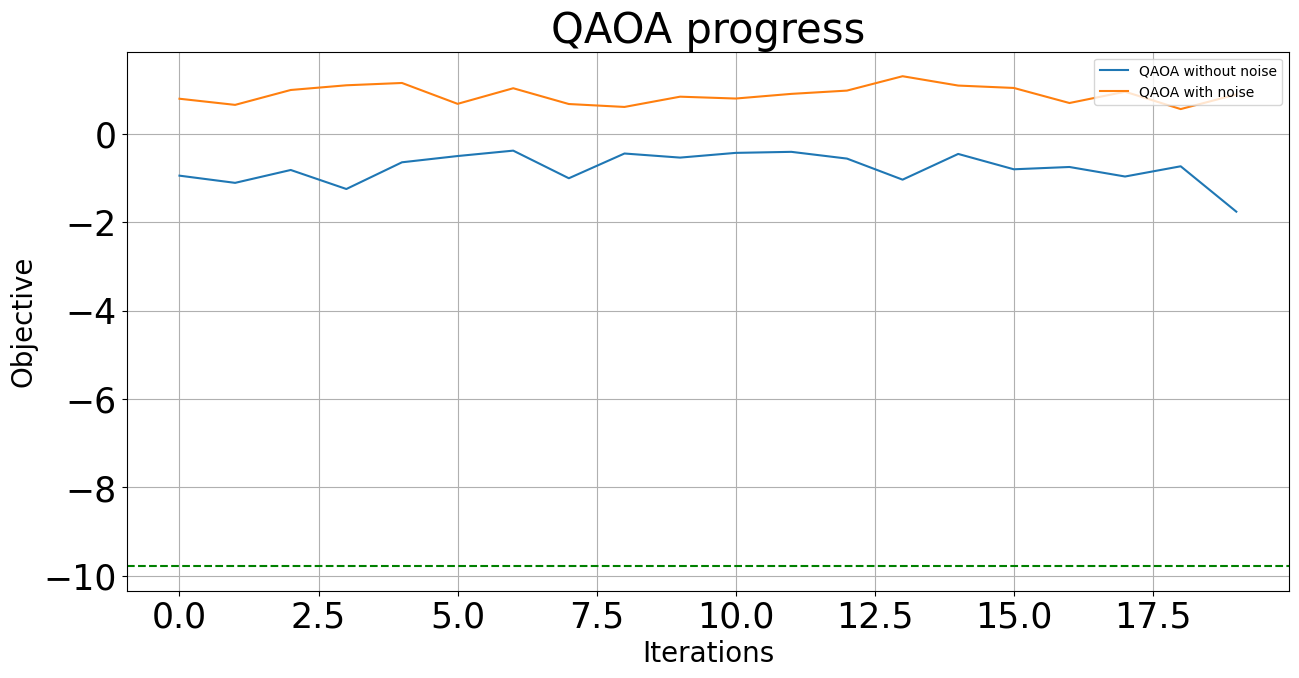

In [295]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.figure(figsize=(15, 7))
plt.title("QAOA progress")

x = list(range(len(obj_list)))
plt.plot(x, obj_list, label=f'QAOA without noise')

x2 = list(range(len(obj_list_noise)))
plt.plot(x2, obj_list_noise , label=f'QAOA with noise')

plt.axhline(y=np.min(obj_vals), color='g', linestyle='--')

plt.grid()
plt.xlabel("Iterations", fontsize=20)
plt.ylabel("Objective", fontsize=20)
plt.legend(fontsize=10, loc='upper right')


plt.show()

#### Loop over layers

In [296]:
qaoa_results_ideal = dict()
qaoa_results_noisy = dict()

x0 = np.random.randint(100, 1000, size=2)

best_pars = []
best_pars2 = []

for layer_number in range(1, 7, 1):

    print(f'Layer = {layer_number}')

    if len(best_pars) >  0:
        x0 = np.concatenate((best_pars, [0, 0]))
        print(x0)

    res, _ = SPSA(objective_function, x0, args=(obj_vals, financial_interactions, False))

    if len(best_pars2) >  0:
        x0 = np.concatenate((best_pars2, [0, 0]))
        print(x0)

    res2, _ = SPSA(objective_function, x0, args=(obj_vals, financial_interactions, True))

    best_pars = res.x
    best_pars2 = res2.x

    qaoa_results_ideal[layer_number] = res.fun
    qaoa_results_noisy[layer_number] = res2.fun

Layer = 1
[-8458252.7443976  8458975.7443976] 0.05903057058152014 0.05903057058152014
[-24649269.5252987   -7732041.03650351] 0.7646263073348138 0.05903057058152014
[-74937993.07426362 -58020764.58546843] 0.628117507230191 0.05903057058152014
[-48380135.79371189 -84578621.86602016] 0.4661463310124818 0.05903057058152014
[-47924634.34108693 -84123120.41339521] 1.1617782296432593 0.05903057058152014
[-35920981.4742859  -96126773.28019625] 1.1399229571770828 0.05903057058152014
[-28766027.85502534 -88971819.66093569] 0.48458563015398276 0.05903057058152014
[ -6777885.45729968 -66983677.26321002] 0.9442850783942982 0.05903057058152014
[-10917421.41685109 -71123213.22276144] 1.2757622846728687 0.05903057058152014
[ 21072580.90737062 -39133210.89853972] 0.6809932175111271 0.05903057058152014
[ 29900481.90448108 -47961111.89565018] 0.8098309435216818 0.05903057058152014
[ 24276246.41213632 -42336876.40330542] 1.2490332372047028 0.05903057058152014
[ 21603563.67303367 -45009559.14240807] 0.510

In [293]:
import matplotlib
matplotlib.rcParams.update({'font.size': 25})

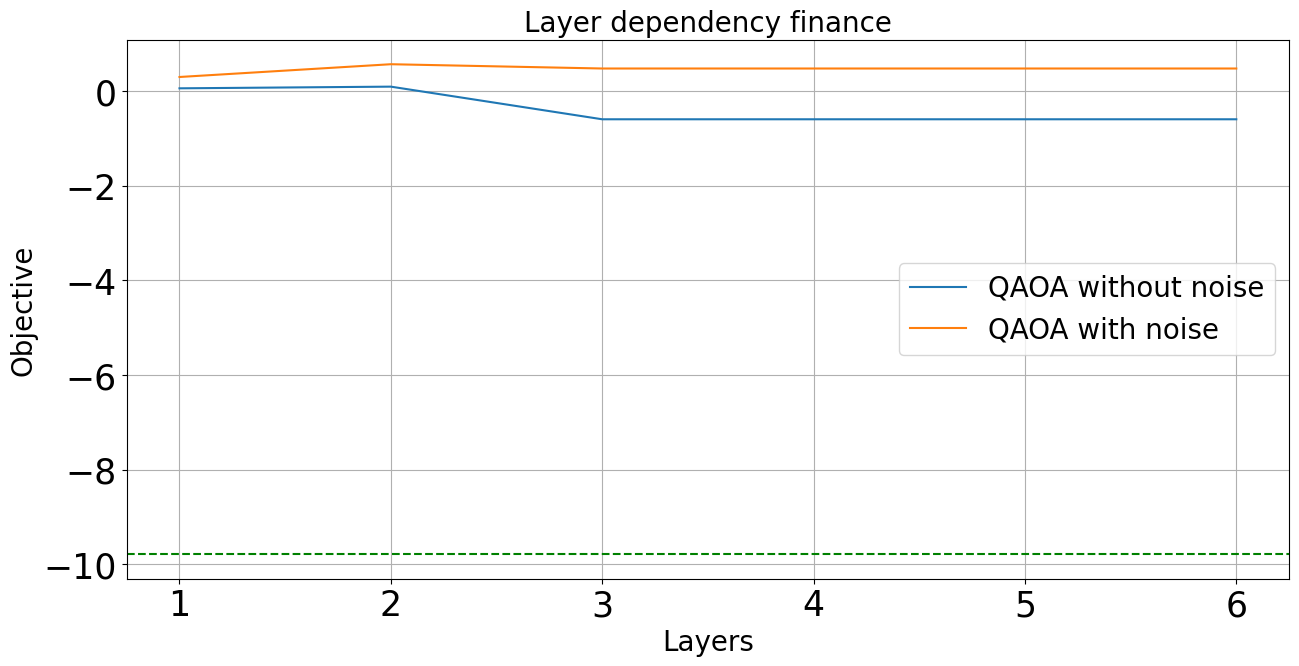

In [297]:
plt.figure(figsize=(15, 7))
plt.title("Layer dependency finance", fontsize=20)

lists = qaoa_results_ideal.items()
x, y = zip(*lists)
plt.plot(x, y, label=f'QAOA without noise')


lists = qaoa_results_noisy.items()
x, y = zip(*lists)
plt.plot(x, y, label=f'QAOA with noise')

plt.grid()
plt.xlabel("Layers", fontsize=20)
plt.ylabel("Objective", fontsize=20)
plt.legend(fontsize=20, loc='right')

plt.axhline(y=np.min(obj_vals), color='g', linestyle='--')

plt.savefig('results.png')
plt.show()